In [56]:
import sklearn
from efficientnet.keras import preprocess_input
import os
import cv2
import librosa
import librosa.display
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint
from datetime import datetime 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.python.keras.optimizers import adam_v2
from sklearn import metrics
from tensorflow.python.keras.callbacks import ModelCheckpoint
from datetime import datetime 


In [57]:
#get the data path
trainpath= ("./reduce_sound/")

# get the training classes
keys=os.listdir(trainpath)
values=range(len(keys))

training_classes = dict (zip(keys,values))
print('training_classes = ',training_classes)

training_classes =  {'grey-cheeked warbler': 0, 'grey-sided laughingthrush': 1, 'grey-winged blackbird': 2, 'himalayan cuckoo': 3, 'indian spot-billed duck': 4, 'mountain scops owl': 5, 'mountain tailorbird': 6, 'pale blue flycatcher': 7, 'scaly laughingthrush': 8}


# Loading the Dataset

In [58]:
#Loading training data
train_label=[]
folder_item_numbers = []
total_files=0
for folder in  os.listdir(trainpath ) : 
    train_label.append(folder)
    files = glob(pathname= str( trainpath  + folder + '/*.wav'))
    folder_item_numbers.append(len(files))
    total_files= total_files+len(files)
print('--------------------------------------------------')        
foldernames=pd.DataFrame({'Folder_name':train_label})
itemnumbers=pd.DataFrame({'Number of Files':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)
print('--------------------------------------------------')  
print('Totall Number of Files:                   {}'.format(total_files))    

--------------------------------------------------
                 Folder_name  Number of Files
0       grey-cheeked warbler              150
1  grey-sided laughingthrush              162
2      grey-winged blackbird              150
3           himalayan cuckoo              168
4    indian spot-billed duck              156
5         mountain scops owl              120
6        mountain tailorbird              144
7       pale blue flycatcher              168
8       scaly laughingthrush              132
--------------------------------------------------
Totall Number of Files:                   1350


# Function to extract feature 

This function will extract the feture from individuals file using mfccs feature extractor

In [59]:
def extract(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In this block of code we are reading indivisual files and extracting it's feature using the obve function extract()

In [60]:
extracted_features=[]
final_df=[]
row=0
for folder in os.listdir(trainpath):
    audio= glob(trainpath+folder+"/*.wav")
    for i in range(len(audio)):
        s=os.path.join(os.path.abspath(audio[i]))
        feature=extract(s)
        print('\nExtracting Feature: {} / {} Files of the classs: {}\nPath: {}'.format(i,len(audio),folder, audio[i]))
        extracted_features.append([feature,folder])
        row_feature = []
        for i in range (len(feature)):
            row_feature.append(feature[i])
        row_feature.append(folder)
        print('\nRow added {} \n '.format(len(final_df)))
        row = row+1
        print(row_feature)
        final_df.append(row_feature)


Extracting Feature: 0 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys0.wav

Row added 0 
 
[-472.10077, 58.775963, 7.6819854, 23.957186, 0.5927175, 16.293337, 2.3274417, 7.689467, 4.08543, 5.579339, 0.87876517, 7.2429514, 1.0136265, 5.158349, 0.9515722, 4.718149, -1.6044178, 6.2166142, -1.5918176, 5.3788652, -0.5040119, 3.7143116, 0.35114777, 3.4020994, -0.4436755, 4.263005, -1.5043738, 4.3749285, -1.5044032, 3.7154527, -0.42449802, 3.295277, -1.2969853, 2.8804922, -1.4427377, 2.6795812, -0.6610387, 2.3002868, -0.9078946, 2.5063524, 'grey-cheeked warbler']

Extracting Feature: 1 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys1.wav

Row added 1 
 
[-626.49115, 12.133249, -13.319744, -1.6208665, -5.934765, -5.031613, -9.316302, 11.564653, -13.300512, 1.906825, 1.9348176, -3.937581, 0.26717025, -2.0396464, 3.532683, -4.632345, 0.7469176, -0.033046957, -3.256


Extracting Feature: 13 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys11.wav

Row added 13 
 
[-334.58188, 22.666418, -22.608894, 36.052376, -23.55992, 46.568264, 5.394583, -0.39557633, 16.99482, -6.4631743, 12.5293045, 13.029734, 3.3593209, 6.7859926, 9.365678, 11.619059, -4.5098023, 15.918698, -1.5755117, 12.159097, 1.0701596, 11.869171, 3.5575302, 7.600545, -1.8335422, 12.614889, 0.044040978, 6.0260606, 3.4068162, 6.7545505, -0.081250295, 3.3225849, 5.3728666, 5.1541433, 0.6990079, 4.4419465, 4.558367, 2.3744001, 2.1143038, 6.6105566, 'grey-cheeked warbler']

Extracting Feature: 14 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys110.wav

Row added 14 
 
[-643.472, -12.019425, 2.4922085, 10.8078575, -8.522024, 8.385024, -0.9295703, 2.000164, 2.0341558, 0.5777646, 0.12832858, 1.983705, -0.53317076, 0.33428127, 2.9475358, -3.5445757, 3.4918578, -0.11093288


Extracting Feature: 26 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys121.wav

Row added 26 
 
[-668.2224, -24.88135, -1.681118, 22.017164, -22.576536, 13.171788, -1.097335, -4.235355, 4.4152017, -2.356859, 1.9531435, -2.736311, 2.029313, 0.8246106, -0.91415614, 0.60644233, -1.0159457, 2.252586, -2.584998, 1.8928386, -0.037994187, -1.1031736, 1.3944252, -0.8564152, 0.43377465, 0.15895163, -0.56539816, 1.042165, -1.0637535, 1.059601, -0.89993393, 0.585826, -0.15861031, 0.07797005, -0.005204304, 0.013963708, 0.13448937, 0.109452665, -0.28063074, 0.6878851, 'grey-cheeked warbler']

Extracting Feature: 27 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys122.wav

Row added 27 
 
[-642.87866, -9.666618, 2.883715, 9.441191, -12.107383, 9.034517, -3.635299, -2.4748154, 3.9414093, -3.6246333, 3.011409, -0.20296125, 0.91008455, 1.3412495, -0.05982918, 1.3830955, -0.6


Extracting Feature: 39 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys133.wav

Row added 39 
 
[-690.8224, 0.825905, 6.3423095, 6.2125773, -9.939589, 4.0914583, -4.2422624, 1.3222572, -3.7482667, 0.9256019, 2.1808605, -2.8636944, 2.688103, -0.62640125, 0.111900546, 0.39021575, -0.1782876, 0.33903104, -0.2657239, 1.8458211, -1.3479884, 0.99130964, 0.42136264, -0.29366258, -0.017333413, 0.75893915, -0.36884335, -0.2307046, 0.91578585, -0.908905, 0.28448543, 0.11103798, -0.19328305, -0.22101037, 0.09830263, -0.17263901, -0.2479087, -0.351095, -0.0387692, -0.783583, 'grey-cheeked warbler']

Extracting Feature: 40 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys134.wav

Row added 40 
 
[-575.7319, -8.225976, 2.2706807, 4.0933576, -7.849049, 6.568322, -3.2723448, -0.5950411, 1.8082289, -2.6300557, 2.0165613, -0.9756256, 0.6883309, 0.3773489, -0.48765606, 1.05791


Extracting Feature: 52 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys145.wav

Row added 52 
 
[-628.5136, 1.6458888, -0.110210694, 1.2044739, -5.667893, 6.2438803, -0.057877228, -0.51528317, 0.27032703, -1.8843613, 2.3982716, 1.7526646, 0.70070636, -0.2224132, -0.17616099, 1.3083465, 1.1813736, 1.1704352, -0.10521833, 0.1279958, 0.55477005, 1.062888, 0.89366674, 0.24672161, 0.113591775, 0.33685455, 0.770361, 0.8237925, 0.26703778, 0.21486962, 0.1611281, 0.55939925, 0.40196785, 0.1694899, 0.1569071, 0.4014627, 0.47161546, 0.5377182, 0.2993782, 0.0005419465, 'grey-cheeked warbler']

Extracting Feature: 53 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys146.wav

Row added 53 
 
[-685.68494, -23.108137, -2.9118767, 16.71587, -14.67331, 7.7825236, -1.0655487, -2.8440487, 2.6927984, -0.5033224, -0.21057057, -1.2226633, 1.0553057, 0.44236076, -0.049846157, -0.38


Extracting Feature: 65 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys22.wav

Row added 65 
 
[-415.81192, 60.676346, 8.352527, 13.017828, -18.709248, 10.760261, -4.7035127, -2.942172, -1.8460013, -4.2623067, 1.834757, 4.107023, -1.5766096, 2.9460723, 0.13428155, 4.1373997, -0.5427172, 4.4605584, -1.3759111, 3.1363728, -0.68360746, 3.562498, 0.1103076, 3.8095183, 1.6600665, 3.683357, 1.3790543, 4.0048776, 1.5981185, 3.1913836, -0.61798805, 2.3337326, 0.98463, 3.9147155, 0.46401238, 1.6012201, -0.5883383, 2.9635994, 0.6981267, 2.8476384, 'grey-cheeked warbler']

Extracting Feature: 66 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys23.wav

Row added 66 
 
[-359.11438, 54.651295, -33.86368, -18.501501, -34.539677, -16.10486, -28.719166, -21.664253, -24.267462, -17.37195, -18.245178, -8.973211, -14.087494, -9.655143, -12.501509, -5.2801747, -7.7767906, -3.108


Extracting Feature: 78 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys34.wav

Row added 78 
 
[-664.7126, -20.109, 12.7642355, 30.031216, -19.357616, 16.291739, -5.7544203, -2.8441854, -6.5526404, -1.652141, -2.2799897, -4.1792274, -1.8226529, 2.2396533, -1.0179026, 0.23008148, 0.48615685, 1.2463497, 0.292648, 1.3061874, 1.7989377, -0.96533215, 2.0990717, -0.38015425, 2.0339227, -1.9988756, 2.1804945, 1.0312537, -1.4733453, 1.4862918, 0.12141166, 0.5641316, -0.49740615, 3.2413137, -1.4801468, 1.4418418, 1.7915294, -1.003497, 0.87424743, -0.07165882, 'grey-cheeked warbler']

Extracting Feature: 79 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys35.wav

Row added 79 
 
[-669.5203, -16.313545, 10.192417, 21.83685, -15.437692, 12.941592, -5.078684, -1.6261791, -4.828251, -0.8228313, -1.3177278, -2.5082357, -1.3322155, 2.5570152, -0.93829644, 0.3663141, 1.19381


Extracting Feature: 91 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys46.wav

Row added 91 
 
[-607.63654, 21.996874, -8.864005, 4.416042, -4.4183345, 11.878925, 5.722153, 0.30487818, -0.38170585, 3.1546376, 2.5532484, 3.7885685, 3.0042598, 1.3268886, 0.8837633, 4.2977633, 2.2514796, 2.3079503, 2.343432, 0.42054206, 3.3727841, 2.2900589, 2.4999597, 2.031306, 1.4431622, 2.4722877, 2.3992424, 2.482104, 1.0271032, 2.753618, 1.5698655, 2.304788, 2.4382381, 1.7570087, 2.013501, 2.3219523, 1.9698937, 2.0667875, 1.4887649, 2.3351955, 'grey-cheeked warbler']

Extracting Feature: 92 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys47.wav

Row added 92 
 
[-607.42847, 27.885668, -5.551306, 4.6322527, 0.39653525, 11.61722, 6.667498, 2.3236773, 2.1034043, 4.760596, 5.0216556, 4.877978, 3.2614112, 2.6278586, 2.5613039, 4.3533835, 2.983601, 3.757111, 3.0228555, 0.6740963


Extracting Feature: 104 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys58.wav

Row added 104 
 
[-649.1672, -17.70431, -15.425668, 16.63044, -15.080345, 28.862406, 4.3859677, -5.7758794, 8.658365, -6.598092, 5.439235, 9.355228, -4.4603558, 0.19691178, 8.466372, 0.23368216, -0.3913659, 3.199715, 0.7339423, 2.8541324, 0.5902594, 2.2668064, 4.740429, -1.145943, 0.18845852, 4.5731406, 0.27336502, 0.65733945, 1.9084256, 2.6583788, -0.1711894, 0.73920065, 2.6877456, 1.7310704, -0.31091693, 1.9679672, 2.408303, 0.5920861, 1.0349995, 2.187324, 'grey-cheeked warbler']

Extracting Feature: 105 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys59.wav

Row added 105 
 
[-679.1194, -14.182591, -11.225291, 15.244374, -12.236542, 24.622744, 4.8485775, -3.931857, 8.50012, -4.4831634, 5.5110555, 8.662331, -1.7886178, 1.3666452, 7.5452056, 1.4013805, 0.307313, 3.4745333, 1.53


Extracting Feature: 117 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys7.wav

Row added 117 
 
[-138.89989, 106.26718, -36.906498, 21.79175, -7.951763, 17.08743, 0.3940749, 6.794537, 0.80616134, 7.4878464, 3.1848056, 8.643511, 4.4864597, 4.892924, 2.8423593, 7.956112, 3.5160124, 7.2109866, 2.9528472, 4.2766466, 3.744438, 7.4595284, 3.6350806, 5.572959, 2.1294274, 6.5404353, 3.2473428, 6.43571, 1.1017739, 5.916842, 3.322092, 5.3052216, 3.5484197, 5.702164, 2.6905181, 5.445633, 2.3847303, 5.0008636, 2.8097591, 5.0928445, 'grey-cheeked warbler']

Extracting Feature: 118 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys70.wav

Row added 118 
 
[-652.9041, -12.7302685, -14.392509, 8.915024, -5.7809253, 4.6990643, -2.8318853, 1.5648351, -7.498707, -4.464099, 5.255298, -0.21433987, 0.3985568, -2.2375438, -2.214455, 1.2931249, 3.2825487, -1.0042912, -1.2569226, 0.3


Extracting Feature: 130 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys81.wav

Row added 130 
 
[-680.68164, -11.665739, -11.908745, 14.701421, -9.042931, -0.13819811, 8.7748375, -5.1735187, -2.1827521, 2.023555, 0.010197074, 1.188477, -1.3313931, -0.2164847, 0.6645736, -1.0149161, 1.5813186, -0.74511886, -0.36746806, 1.3337576, -0.9452178, -0.13835034, 0.16855215, 0.14992952, 0.40593708, -0.06523489, -0.031739034, -0.23900977, -0.00025832732, 0.28959778, -0.08129952, 0.18346678, 0.16748768, -0.24617973, -0.17460333, 0.2389489, 0.019029846, 0.1573294, 0.11686997, -0.10751153, 'grey-cheeked warbler']

Extracting Feature: 131 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys82.wav

Row added 131 
 
[-732.7042, -13.774696, 3.8751187, 9.452746, -11.283173, 9.973187, -2.2476985, -0.9731469, 4.000818, -1.9876473, 2.45178, -0.47853795, 1.2967027, 0.447062, -0.3167


Extracting Feature: 143 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys93.wav

Row added 143 
 
[-671.7244, -9.816923, -5.503471, 16.09132, -7.4450297, -2.4283216, 7.285178, -4.8594337, -0.30157796, 2.713646, -4.261626, 2.067838, -0.045629315, 0.26488385, 0.6914962, -0.012363171, 0.71150494, 1.1587735, -0.06968446, 1.2311277, -0.14765368, 0.4727164, 0.2155317, 0.1841737, 0.21238253, 0.1135719, 0.2199023, -0.17830141, 0.34333852, 0.61045706, 0.22100224, 0.44456294, 0.3646074, 0.47496513, 0.48465207, 0.79500043, 0.5037476, 0.30729586, 0.24161045, 0.30415562, 'grey-cheeked warbler']

Extracting Feature: 144 / 150 Files of the classs: grey-cheeked warbler
Path: ./reduce_sound/grey-cheeked warbler\phylloscopus poliogenys94.wav

Row added 144 
 
[-654.3147, -0.61023587, -5.2661033, 0.43384692, -2.4911568, 0.20020169, -1.9263827, -1.2103425, -0.7707655, 0.22358379, -1.4257623, -0.5034126, 0.9530207, -0.040393963, -0.49781194, 


Extracting Feature: 6 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus103.wav

Row added 156 
 
[-839.54755, 1.330705, -18.254332, 11.31424, 3.443215, 4.6080866, -6.414178, 3.1002088, 6.352395, -0.3915847, 0.0686786, 0.08118901, 5.0942807, 0.6011164, -1.4030972, 1.3310013, -0.8001275, 0.46917304, -0.82071316, -0.34704965, 0.9656589, 0.061566036, -1.379747, 0.03449325, 0.3039138, -0.094112776, -0.8341197, -0.8176156, -0.44777536, -0.18917492, -0.2937871, -1.0184543, -0.78145164, -0.1613855, -0.5033325, -0.51796967, -0.5995242, -0.428712, -0.036405805, -0.42648053, 'grey-sided laughingthrush']

Extracting Feature: 7 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus104.wav

Row added 157 
 
[-834.9492, 12.000189, -26.35672, 2.45323, 3.85743, 8.237382, 3.8987412, -7.087012, 1.0872387, 4.4643955, 2.8822546, 2.5658264, -3.3421571, 0.2677461, 4.28


Extracting Feature: 19 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus115.wav

Row added 169 
 
[-583.5385, -0.57406926, -37.36896, 24.6459, -0.1490685, 13.156612, 5.849065, -21.096443, 2.9193923, 23.159544, -17.10927, -0.58072925, 11.089825, -9.32182, 4.267464, 3.0778604, -6.392494, 6.0822954, -0.13779701, -4.6805844, 3.769635, 2.0768702, -4.503586, 1.4125121, 0.8193044, 1.1964087, -2.6016316, 0.8380576, 1.3643761, -0.8589055, -1.1284448, 1.743381, -2.799894, 1.7842753, 0.102981426, -1.3328567, 2.5698361, -0.094463594, -1.776786, 2.0752203, 'grey-sided laughingthrush']

Extracting Feature: 20 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus116.wav

Row added 170 
 
[-570.41626, -3.0540957, -5.3968062, 7.5484543, -2.2935188, 3.4465039, -1.7998841, 0.67621404, -0.4172761, -1.2738909, 2.942593, -2.1302679, 0.7335901, 0.11954324, -0.41052267


Extracting Feature: 32 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus127.wav

Row added 182 
 
[-739.35205, 8.703209, 0.8537882, 7.8733687, 0.009994977, 1.99465, -8.789726, -4.472083, 4.602361, 5.0241723, -1.0009229, 2.6199965, 2.1256926, 0.9888282, 0.25633666, -1.4218925, 0.73048025, -0.40896404, 0.26810738, -0.9444745, -0.37315175, 0.7942381, -2.0416858, 0.3896277, -0.6156848, -0.29375193, -0.46766454, 0.34491608, -0.98049897, -0.3244507, -0.42297223, -0.855381, -0.71622765, -0.48901537, -0.56246156, 0.32417917, -0.2123413, -0.109992765, -0.33563375, -0.49357733, 'grey-sided laughingthrush']

Extracting Feature: 33 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus128.wav

Row added 183 
 
[-591.3872, 1.8933622, -12.832901, 3.0138032, 7.791116, 3.9309592, 1.2413793, 8.547952, 6.9606605, -1.9328718, -1.4663626, 9.608941, 6.130065, 0.21656


Extracting Feature: 45 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus139.wav

Row added 195 
 
[-762.5994, 4.2874756, -4.0201178, 12.201047, 0.13058972, 1.6851217, -5.4775567, -5.0773416, 3.6578703, 0.6189685, 0.21658456, 0.17412357, 4.439923, 3.1339927, -0.42261335, 1.6959172, -1.1368188, 0.45080158, -0.46597174, -1.8022946, 1.2062616, -0.025214478, 0.054353427, -0.14742024, -0.14620669, 0.9742491, -0.5931735, 0.83414125, 0.007529966, 0.32900095, 0.9298535, -0.69653803, 0.5409433, 0.04924329, -0.30582473, 0.3671874, -0.21317677, -0.0037804055, -0.021720465, 0.32787853, 'grey-sided laughingthrush']

Extracting Feature: 46 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus14.wav

Row added 196 
 
[-457.46033, 57.87721, -19.560322, 35.04394, -4.665599, 15.35156, -10.553357, 14.601997, 7.1101966, 1.6356382, 1.2074139, 4.2126555, 7.305669, 3.6


Extracting Feature: 58 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus150.wav

Row added 208 
 
[-887.5341, -8.327458, -9.981789, 13.801187, -4.4675713, 5.2855625, -5.284766, -1.7368789, 6.3891654, -1.90077, 2.454729, -0.59069335, 2.7024567, 1.9990969, -2.4214718, 3.3652844, -1.2824703, 0.40816015, 1.646717, -1.5521533, 1.1813297, 0.13850985, -0.8437506, 0.037491787, -1.7004417, 0.75188434, -0.6240268, -0.018875167, 0.45971856, 0.30999866, 1.67123, 0.20595312, 0.08363483, 0.49657616, -0.7527147, -0.6360483, -0.426569, -0.83299226, -0.21141247, 0.113559075, 'grey-sided laughingthrush']

Extracting Feature: 59 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus151.wav

Row added 209 
 
[-619.8686, -6.210898, -13.898745, 7.7210884, 0.118595175, 0.28979844, 1.0209829, 0.18309861, -1.9729534, -1.4369426, 1.5976303, 2.054386, -1.3700352, -0.730243


Extracting Feature: 71 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus17.wav

Row added 221 
 
[-346.72244, -19.795816, -101.64843, -37.059845, -17.397017, -0.2442427, -15.876802, 10.273065, 18.101704, 15.835766, 0.15238991, 3.4711063, -0.88414985, 5.0568075, -6.6459785, -4.3226733, -7.9635158, -4.3866234, -0.5431905, 5.4855723, -2.1608253, 3.9145572, 1.9468057, 2.6631334, -2.0990376, 6.1482377, 0.021688556, -1.4200068, -5.11582, -2.4594874, -3.8527298, 3.0870354, 0.23321095, 1.8692223, 0.89792687, 1.4833367, -3.5227137, 1.6526955, 2.8731813, 3.1735585, 'grey-sided laughingthrush']

Extracting Feature: 72 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus18.wav

Row added 222 
 
[-491.56494, 70.89178, 6.2553053, 31.07439, -19.42415, 21.089716, -2.7888796, 7.0135694, 0.13912968, 4.78182, 2.403502, 1.9799806, 4.763277, 5.3619757, -1.9055382, 


Extracting Feature: 84 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus29.wav

Row added 234 
 
[-535.811, 12.485691, -6.8756056, 6.5341034, -9.637998, 5.3769093, 2.35391, -6.8499994, 6.133354, -1.4052485, -4.230998, 5.2018843, -3.2935634, -1.7647059, -2.119151, -1.9938109, -1.3799243, -1.232578, -0.7637003, -1.4999601, 1.0653507, -0.26653865, -1.6216141, -0.2814205, -1.2745925, -1.0172267, 0.2668613, -1.0813806, 0.027752543, 0.38402045, -0.31411964, -0.40504685, -0.5358175, -0.22293103, -0.28076413, -0.10213298, -0.028959477, 0.120345846, 0.003826704, -0.085212044, 'grey-sided laughingthrush']

Extracting Feature: 85 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus3.wav

Row added 235 
 
[-543.8834, 61.4574, 8.532282, 28.859734, -24.178308, 31.543474, -7.178931, 14.061333, 4.442366, 6.174594, 2.4593334, 2.7429147, 5.094244, 4.4541454, -1.


Extracting Feature: 97 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus40.wav

Row added 247 
 
[-783.0096, 5.6039953, -5.171323, 15.241668, -0.21713093, 1.7644837, -6.460215, -6.027853, 4.673704, 0.7489252, -0.42566907, 0.28046033, 5.4116135, 3.5247467, -0.6704104, 1.8584212, -1.2101259, 0.4195126, -0.86661565, -2.0035203, 1.5369653, 0.1510678, -0.1947929, -0.14030237, 0.1401685, 1.0002611, -0.7158087, 1.2007501, -0.01892767, 0.3243864, 0.95738095, -0.64877295, 0.7469659, -0.05897349, -0.3868769, 0.3862394, -0.14648102, -0.13811973, -0.0072955913, 0.3914974, 'grey-sided laughingthrush']

Extracting Feature: 98 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus41.wav

Row added 248 
 
[-777.5216, 12.624051, -11.149307, 11.075142, 6.1041355, 2.5379195, 4.862032, -7.0005655, -7.289518, 0.06408369, 1.1835275, 1.5482246, -2.5866628, -1.1640562, 


Extracting Feature: 110 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus52.wav

Row added 260 
 
[-588.1898, -1.121278, -6.006273, 8.140456, -3.1583338, 3.189505, -1.5478082, 1.5300081, -0.25469068, -1.2379718, 3.119427, -2.2146382, 0.7470441, -0.04673595, -0.12109966, 1.0053138, -0.3428045, -0.48075297, 0.48097873, 0.7178386, -0.9157092, 0.41353947, -0.14333887, -0.030161625, 0.27795208, -0.19102482, 0.2151409, 0.29280427, 0.3912545, -0.35438803, 0.4068642, 0.59039855, -0.124796286, -0.07630507, 0.2587321, 0.044108525, 0.031036166, 0.28715202, -0.09187511, 0.118304655, 'grey-sided laughingthrush']

Extracting Feature: 111 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus53.wav

Row added 261 
 
[-616.58545, 5.0149393, -13.101628, 8.694264, -0.83517605, 0.1566612, 3.2171223, -2.8111122, 3.463583, -1.1677513, -2.5382433, 2.975064, -0.6150036


Extracting Feature: 123 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus64.wav

Row added 273 
 
[-786.1657, -3.4243982, -21.695276, 1.4125218, 4.894626, 1.4935749, -7.9087486, 0.13972673, 4.250526, -1.0229554, -4.5231524, 1.2288593, 1.5602202, -1.4557084, 0.22756964, 0.7273078, -1.5411038, -1.0145417, 1.5281757, 1.8032259, -1.9289415, -0.93266284, -0.07734517, 1.0080591, 0.7303886, -0.6177721, -1.5211564, 1.0552796, 0.6787219, -1.4625107, 0.80609536, 0.04388394, -0.053115793, -0.4462991, -0.8799738, 0.53490466, 0.40674406, 0.5524538, -0.61147, -0.08443004, 'grey-sided laughingthrush']

Extracting Feature: 124 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus65.wav

Row added 274 
 
[-774.89087, 7.474011, -27.044401, -7.153148, 0.028239122, 6.9687743, -0.26147553, -5.758135, -3.0022671, 3.1712809, 2.2853346, -2.634285, -2.7204816, 1.1729782


Extracting Feature: 136 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus76.wav

Row added 286 
 
[-598.6819, -6.4229784, -15.223103, 8.128422, 0.5629669, 0.4614995, 1.4528735, 0.19557075, -2.1467512, -1.4248639, 1.5042567, 2.1003199, -1.4413729, -0.80298126, 0.47126287, 0.13736358, -0.117127314, -0.062291786, -0.12786545, -0.9478289, -0.38754, -0.69993687, -0.29327223, -0.45170316, 0.8042182, 0.30732584, -0.95327353, -0.41691583, -0.75466955, 1.1406288, -0.91006464, -0.2645783, -0.77232933, 0.3788763, 0.44517836, -0.18515754, -0.73566306, -0.78016514, 0.5316593, -0.84132975, 'grey-sided laughingthrush']

Extracting Feature: 137 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus77.wav

Row added 287 
 
[-587.8246, 0.92994624, -20.580942, 0.94549835, 3.335097, -0.6485055, 0.5171247, 2.1563923, 1.8911663, -0.65667653, -2.318987, -1.7614219, 1.0


Extracting Feature: 149 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus88.wav

Row added 299 
 
[-617.7952, 2.756818, -7.751676, 4.939393, 8.686888, 3.6888871, 0.9956859, 8.370068, 8.06194, 0.80377764, 0.41890505, 9.367623, 6.209636, 1.0097276, 0.05168627, 8.082983, 3.278574, 1.5827849, 3.147289, 5.0987525, 1.0477363, 3.2543702, 3.107388, 2.962209, 3.1890697, 1.1984888, 3.2079813, 2.9001584, 0.87471306, 2.9806883, 2.265137, 1.726121, 2.2141142, 1.1285064, 1.9116372, 1.8134612, 1.1418604, 1.6391582, 1.3052447, 2.030857, 'grey-sided laughingthrush']

Extracting Feature: 150 / 162 Files of the classs: grey-sided laughingthrush
Path: ./reduce_sound/grey-sided laughingthrush\pterorhinus caerulatus89.wav

Row added 300 
 
[-599.36, 5.5529294, -11.690419, -1.193975, 4.3099275, 9.53621, -0.12745684, 0.8448018, 3.7590077, 11.219311, 3.3473833, -2.6724625, -0.30016702, 5.169605, 6.9982114, 1.3100492, -0.39815578, 3.53013


Extracting Feature: 0 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul0.wav

Row added 312 
 
[-236.91843, 67.80071, 10.581423, 8.086258, -2.4237092, 1.7745659, -6.375327, 4.0466614, -6.559782, 5.3429055, -5.1640735, 7.497471, -2.8703256, 8.35877, -1.9362309, 5.7570944, -0.78660303, 5.2407503, -0.36511222, 4.609015, 1.1154332, 3.743887, 0.25598377, 3.91592, 0.9637722, 4.1730804, 0.7091097, 4.0352607, 0.050828688, 3.922149, 0.1743745, 3.9981163, -0.22805536, 3.445685, -0.32170585, 3.5162985, -0.14771219, 3.769216, -0.5560827, 2.8647854, 'grey-winged blackbird']

Extracting Feature: 1 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul1.wav

Row added 313 
 
[-540.45044, -77.57816, 34.944614, 14.657461, -25.067793, 9.041094, -17.448967, -1.4528737, -20.504648, -12.573602, -7.642486, 0.043969445, -4.531517, 5.4083676, -3.5128326, 2.3720524, -1.1230578, 4.1721344, -2.4292967,


Extracting Feature: 13 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul11.wav

Row added 325 
 
[-412.90933, 7.1867228, -85.52825, 21.194761, -12.884091, -3.5797641, 1.0817071, -7.035884, -15.00371, -6.089922, -6.251422, -0.4368796, -1.7714326, -0.49972394, -0.5607297, -2.3317297, -1.8192574, 1.4907027, -4.6438594, 1.5565976, -0.40220535, 3.0718102, 2.8690307, 1.8809288, -2.1867115, 4.7898417, 0.057137765, 1.7641375, 1.5541284, 2.3939703, -1.9257959, 1.5882442, 1.6222638, 2.852962, 1.2809, 0.4137111, 0.5850546, 3.663912, 1.6763049, 2.98205, 'grey-winged blackbird']

Extracting Feature: 14 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul110.wav

Row added 326 
 
[-559.29987, -13.548314, -25.360928, 15.833271, 0.15413693, -3.8836834, 2.7575889, 4.9208407, -2.7871978, -2.9864252, 1.5981284, 0.6030996, -0.40169436, 1.9020697, 0.54239255, -1.9238397, -0.46712697, 0.35268587


Extracting Feature: 26 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul121.wav

Row added 338 
 
[-624.0343, -4.1783023, -17.328142, 11.269077, 4.713856, -5.9400597, 4.021232, 1.6212728, -6.7031636, -0.718549, 3.0546803, 0.25951687, -2.377078, -2.1596518, 1.3968616, 0.9363202, -0.6364651, 0.12223459, -0.5772237, -0.12960301, 0.9600708, 0.19455293, -0.910263, -0.14132787, 0.04553643, 0.19448702, 0.07948121, -0.50700366, -0.17351367, 0.30809626, -0.1487122, 0.40783077, -0.20963103, -0.39801154, 0.3935299, 0.18774183, -0.10488158, -0.13751003, -0.28118145, 0.09843677, 'grey-winged blackbird']

Extracting Feature: 27 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul122.wav

Row added 339 
 
[-582.75806, -11.505905, -8.278233, 11.278447, -0.2752501, -4.7046742, -0.43107554, 4.7849317, -2.222205, -1.7584552, 2.6091812, -0.8280862, -0.59858286, 0.76470083, 0.092430286, -0.3749


Extracting Feature: 39 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul133.wav

Row added 351 
 
[-629.0365, 8.136605, 5.8294716, 11.379101, 5.140833, 3.1322184, 0.8782238, 4.1610017, 3.0622413, 0.14178388, 2.5038598, 1.396503, 1.2456009, 1.0445758, 1.3080229, 2.4590487, 0.48322737, 1.8212051, 0.37402153, 1.1011204, -0.10412445, 0.5340047, -0.136118, 1.894453, -0.61588997, 0.6804309, -0.111146316, 1.011226, -0.098082416, 0.91108304, 0.26493034, 0.5037245, 0.16607693, 0.7114151, -0.09205233, 0.88931453, -0.188414, 0.68413305, 0.03917513, 0.33450586, 'grey-winged blackbird']

Extracting Feature: 40 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul134.wav

Row added 352 
 
[-689.43085, -8.135499, -20.405012, 11.821863, 5.280608, -5.4671297, 0.36970887, 4.2894406, -4.4062233, -0.34964836, 4.562773, -1.338789, -2.4411783, 0.58355063, 1.9117215, 0.28182214, -0.8740411, -1.134


Extracting Feature: 52 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul145.wav

Row added 364 
 
[-769.38983, -18.840267, -10.371332, 21.982775, -7.997778, 2.1851017, -5.321378, 8.10297, -0.98051786, -2.5538251, 3.4730144, -2.5280638, 2.7526093, -1.3297615, 1.5941519, 0.42462546, -0.4772976, 1.4153591, -0.7614577, 1.0838726, -0.47598085, 0.77398163, 0.8479343, -0.8868653, 1.5707296, 0.2547593, -0.3059321, 1.1641523, 0.0924073, 0.48235863, 0.20015416, 0.8821665, -0.049508277, 0.115711346, 0.8736542, -0.49901196, 0.7247209, 0.19133386, -0.05716015, 0.5864163, 'grey-winged blackbird']

Extracting Feature: 53 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul146.wav

Row added 365 
 
[-653.3671, -2.0494761, -12.245887, 9.504112, 3.499817, -2.16636, 2.4871676, 0.07436215, -6.520697, -1.5378782, 2.0675597, -0.2525872, -2.7032647, -2.4395719, 1.4464267, 1.0506296, -0.5208007, -


Extracting Feature: 65 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul22.wav

Row added 377 
 
[-571.82007, -15.208235, -6.5334964, 10.793655, -0.43239048, -4.2366962, -0.73206854, 4.495718, -1.8910474, -1.5549909, 2.053385, -0.46226764, -0.7841549, 0.97548133, -0.13844419, -0.18584539, -0.4721788, 1.4265963, -1.353659, 0.7182368, -0.07423088, 0.043294325, -0.3397609, 0.77588814, -0.6685953, 0.35237938, -0.13538717, 0.30210122, -0.27536324, 0.18678091, -0.051538173, 0.10522531, -0.03481295, 0.05504822, -0.0027053375, 0.018336918, 0.08111426, -0.025634788, 0.024873683, 0.03781368, 'grey-winged blackbird']

Extracting Feature: 66 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul23.wav

Row added 378 
 
[-454.76407, 0.120870486, -87.94298, 14.081321, 16.157694, -0.50274706, 5.061508, 5.704461, -16.255548, -0.19050762, 6.994127, -7.040998, -6.027508, 1.9730879, 3.1741164, 


Extracting Feature: 78 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul34.wav

Row added 390 
 
[-531.8539, 3.4929247, -20.91175, 27.843988, 13.125026, -0.9555479, 0.474115, 9.593964, -2.6340337, -5.7670646, -0.24358803, 0.18235877, -0.20166084, -0.2950149, 1.7987524, 1.6168203, -0.6664576, 0.6542586, 2.5808237, 1.8681644, -0.4033505, 1.9442132, 1.4979695, -0.20474207, 1.1825626, 1.3351479, 0.10423104, 1.713363, 0.38569474, -0.9608649, 1.7476901, 0.0060321107, -0.76610184, 1.3100748, -0.46375984, 0.87970114, 0.13889842, -0.5152652, 1.0786669, -0.33665013, 'grey-winged blackbird']

Extracting Feature: 79 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul35.wav

Row added 391 
 
[-556.86505, -1.2554035, -20.194036, 21.639032, 10.782766, -2.0680964, -0.6769162, 8.25664, -1.1272143, -4.247135, 0.24144913, 1.1706893, -0.69469595, -0.9354213, 2.5079002, 1.2333688, -1.0204794, 


Extracting Feature: 91 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul46.wav

Row added 403 
 
[-591.66675, 2.6996644, -14.490997, 14.196252, 9.15547, -6.9071317, 3.7055166, 7.2527294, -3.0291421, -1.0984772, 4.0156145, 2.9106665, 0.7171006, 0.87674135, 0.10974574, 0.9518209, 1.661014, 0.6323707, 0.29692817, 1.6504053, -0.10547335, -0.107697904, 1.7430909, 1.4844902, -0.17880082, 0.67281294, 0.97300684, 0.52847326, 0.6540209, 0.9822178, 0.29122582, 0.47098637, 0.5081508, 0.41365066, 0.39040148, 0.5956495, -0.012876549, 0.22819425, 0.29147723, -0.01179984, 'grey-winged blackbird']

Extracting Feature: 92 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul47.wav

Row added 404 
 
[-589.54333, 4.4553175, -10.2143135, 11.804877, 7.082626, -6.079132, 2.4853592, 5.3251615, -2.950009, -1.2297758, 3.1370451, 2.1176822, 0.16193163, 0.3578484, -0.006971361, 0.8388597, 1.6561029, 0


Extracting Feature: 104 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul58.wav

Row added 416 
 
[-624.50665, -13.961685, -23.703268, 13.250849, 6.7635026, -2.3777978, -4.3359103, 1.7784538, 1.1464521, -1.0852981, -0.0820929, 1.2785947, -0.907045, -0.007419733, 1.0033257, -1.5504844, 0.66740376, 1.443145, -1.624014, 1.3203589, -0.17395318, 0.2238798, 0.94293004, -0.34691387, -0.26105845, 1.0169376, -0.37824303, -0.09555439, 0.6522605, 0.17284192, -0.68157834, 0.15882863, 0.2777673, 0.048176236, 0.13014999, 0.19203615, -0.55099064, 0.41198158, 0.21261658, 0.20020479, 'grey-winged blackbird']

Extracting Feature: 105 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul59.wav

Row added 417 
 
[-653.00903, -12.533463, -21.299961, 11.487351, 5.7135367, -1.5570034, -3.33503, 0.9300398, 0.8367518, -0.51292634, -0.1616609, 1.2209343, -0.61608714, -0.35531873, 0.71889806, -0.96348


Extracting Feature: 117 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul7.wav

Row added 429 
 
[-216.59555, 64.008705, -2.5995355, 14.998344, -0.89851356, -1.6592458, -2.4642744, 6.766994, -8.035678, 0.6951418, 0.57986975, 5.9356403, -1.854173, 4.074685, -1.9451267, 4.257737, 0.3127164, 5.3608327, -0.5088177, 5.1089544, -1.4043443, 3.8219528, 0.80464906, 5.599623, -1.0567551, 4.277156, -0.27695352, 4.2290883, -0.2499811, 4.5554657, -0.7360903, 3.3502119, -0.93537116, 3.2433047, -0.6977567, 3.3611276, -1.2625016, 2.5158982, -1.1448916, 2.2203248, 'grey-winged blackbird']

Extracting Feature: 118 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul70.wav

Row added 430 
 
[-798.58606, -4.3056397, -16.232126, 16.18844, 4.118627, 6.9380875, 2.7343166, 6.135814, -5.7917514, 0.62218165, 6.676457, 6.261667, -2.810938, -1.9256331, 2.0267467, 1.9606875, 4.410497, -3.4609725, 0.289


Extracting Feature: 130 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul81.wav

Row added 442 
 
[-771.8492, 3.9848068, -17.326939, 12.663438, 7.757333, 3.907336, -0.26515087, -6.0879574, 5.869563, 6.5705237, -0.7169523, -1.2710317, 4.119769, 4.798741, -0.7500504, 2.1514878, 1.7877401, -1.5814931, 1.6675254, 1.4369287, 0.11249185, 0.73129284, 0.11643744, 0.30730432, 1.0945172, 0.8090812, -0.058164675, 1.276725, 0.6393954, -1.2339746, 1.0173455, 0.94624376, -0.6207531, 0.18035448, 0.102659546, 0.7266804, 0.6084833, -0.49841908, 0.17792955, 0.10246544, 'grey-winged blackbird']

Extracting Feature: 131 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul82.wav

Row added 443 
 
[-603.7457, -26.592768, -16.803438, 14.965484, -2.5985947, 8.780828, -12.215008, 9.101209, -4.9269342, -1.048244, 1.0447568, 2.5879843, -0.17182103, -4.419667, 3.0912492, -2.3779337, 4.0365295, -2.7321


Extracting Feature: 143 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul93.wav

Row added 455 
 
[-579.9007, -10.2638445, -14.479743, 7.667392, 4.977158, 0.5117851, -5.7556863, 0.29610398, 3.125372, 0.37724838, -2.902758, 1.7688245, 0.30363128, -0.46291313, -0.34083167, 0.075714834, 1.0454384, -0.69233114, -0.42137066, 0.8581404, -0.3127826, -0.09151605, -0.027569277, 0.5497497, -0.36429945, -0.07382535, 0.16321239, 0.026297139, 0.21793967, -0.31170768, 0.26534367, -0.115564354, 0.08002034, 0.08793926, -0.10521512, 0.21249768, -0.19224417, 0.1969862, -0.11491572, 0.13872786, 'grey-winged blackbird']

Extracting Feature: 144 / 150 Files of the classs: grey-winged blackbird
Path: ./reduce_sound/grey-winged blackbird\turdus boulboul94.wav

Row added 456 
 
[-618.004, -12.587225, -28.908316, 8.512236, 9.553797, 1.2393485, -2.1222472, 2.2018104, -7.972011, 1.7461319, 7.669501, -1.7208613, -3.6047924, 0.77171725, 3.156406, -1.911792


Extracting Feature: 6 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus103.wav

Row added 468 
 
[-613.98114, 16.682478, 8.833253, 12.085735, -13.644805, 7.095366, -15.409814, -4.383626, -16.226282, -8.049044, -2.2533064, -9.872671, 2.5656543, 0.26840585, 1.0818276, 3.953244, 2.0645075, 7.1065884, 1.3090771, 1.6530899, 1.1517131, -3.3082812, -0.5463084, -2.7985485, -2.7715425, -2.3301938, -3.5798185, -1.4748027, -2.3924408, 0.43047976, 0.9406762, 1.5348488, 2.8110626, 3.4693134, 2.1175714, 2.9173763, 1.3594934, -0.2971666, -0.9834955, -1.3854235, 'himalayan cuckoo']

Extracting Feature: 7 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus104.wav

Row added 469 
 
[-634.7156, 12.487067, 6.4005103, 10.67108, -11.463214, 7.465651, -10.621569, -1.3146453, -11.414212, -6.4393578, -1.1025443, -7.484645, 2.4339318, 0.36858523, 0.3686898, 3.0001347, 1.6188928, 5.4595575, 1.754861, 0.94138944, 0.


Extracting Feature: 20 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus116.wav

Row added 482 
 
[-840.71686, 25.805325, -20.929602, 33.56436, -21.338013, 3.4487286, -7.89152, 0.8292425, -18.040226, 4.7550654, 0.8127824, -8.978291, 8.79037, -2.0043924, 1.9807386, -1.7218082, 5.584152, -5.4956784, 2.267024, 1.3484849, -2.5344968, 2.0380855, -1.0501502, 1.3694797, -2.949176, 2.2636034, -2.0484264, 1.6725179, -0.72148496, 1.04534, 1.7676114, -1.3673304, 1.6802788, -0.9039384, 1.0115547, -2.3196766, 1.5701076, -1.3184495, -0.9478956, 0.6492377, 'himalayan cuckoo']

Extracting Feature: 21 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus117.wav

Row added 483 
 
[-615.66284, 36.28046, 18.518574, 6.4910817, -5.9202533, -11.842606, -16.858196, -21.13426, -18.843655, -12.848516, -8.646399, -2.2366753, -0.70763665, 1.550606, 2.0992362, 1.5280193, 0.50590676, 1.9064286, 0.5374142, 2.1518202, 0.7


Extracting Feature: 34 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus129.wav

Row added 496 
 
[-498.98358, 26.523706, 4.6844783, 1.8401008, 2.2929347, 2.0361788, -3.4856303, -4.301872, -6.8420305, -7.277261, -5.666451, -2.0764244, -0.50246197, 0.080433674, -0.0707547, 0.014531003, -1.0007778, -1.5982277, -0.64240706, -0.26348096, -2.1303022, -2.9813392, -2.6437182, -2.5043833, -2.732055, -2.259551, -2.0035944, -0.11778159, -0.66897255, -0.31130797, -0.13670643, 0.30750075, 1.0304683, 1.629449, 0.9192725, 0.4012369, -0.29485092, -0.11073595, -0.0755723, -0.3373532, 'himalayan cuckoo']

Extracting Feature: 35 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus13.wav

Row added 497 
 
[-294.72137, 67.492966, 10.993571, 31.796112, -16.972374, 22.296917, -13.104333, 9.044983, -1.6936313, -4.822737, 0.25775564, -0.22414166, 1.9464619, 3.4248023, 0.51451176, 11.428139, 6.308412, 5.1821, 1.04


Extracting Feature: 48 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus141.wav

Row added 510 
 
[-769.922, 7.875959, 5.0478973, 17.65031, -9.161839, -1.9788636, 3.5189598, -7.1573324, -4.742996, 2.163795, -3.0369287, 0.56689864, 4.703877, -1.7987387, 2.368684, 2.7792623, 1.5711651, 2.6993535, 1.9600737, 1.0862416, -0.18470997, 0.8596345, -0.9662806, -2.746336, -1.4650015, -1.8459784, -2.1087537, -0.16950133, -0.4927679, -0.65480924, 1.3452516, 1.5361589, 1.4518307, 2.2613616, 0.93583286, 0.06830918, 0.7394709, -0.96255845, -0.8261797, -0.43857303, 'himalayan cuckoo']

Extracting Feature: 49 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus142.wav

Row added 511 
 
[-682.9306, 6.1617694, 9.275298, 12.11652, -6.745241, 2.790609, -2.6603484, -5.0818706, -0.8395595, -3.7824214, -0.55921066, -1.2517054, 0.4441637, 2.342189, 0.74449915, 3.906703, 3.0763514, 2.4098878, 2.6986191, 0.4723635, 


Extracting Feature: 62 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus154.wav

Row added 524 
 
[-644.93713, 11.965541, 8.364201, 3.8507175, -0.612987, -4.062586, -6.214034, -7.4290576, -7.7736692, -7.0017686, -5.359284, -3.151045, -0.70743763, 1.2184863, 2.3115485, 2.7344105, 2.6562586, 2.2898061, 1.8341532, 1.2615597, 0.49153516, -0.26789144, -0.9220404, -1.4180975, -1.561085, -1.4110128, -1.0815158, -0.5792966, -0.0032535708, 0.49080577, 0.8869667, 1.2080554, 1.3608384, 1.3422631, 1.146788, 0.70293695, 0.09330815, -0.5243012, -1.0030271, -1.2366996, 'himalayan cuckoo']

Extracting Feature: 63 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus155.wav

Row added 525 
 
[-682.9306, 6.1617694, 9.275298, 12.11652, -6.745241, 2.790609, -2.6603484, -5.0818706, -0.8395595, -3.7824214, -0.55921066, -1.2517054, 0.4441637, 2.342189, 0.74449915, 3.906703, 3.0763514, 2.4098878, 2.6986191, 0.4723


Extracting Feature: 75 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus166.wav

Row added 537 
 
[-634.9096, 1.3333308, 2.426819, 10.054771, -6.2096596, 3.8654773, -8.718383, -2.1724193, -4.8071594, -2.8450928, 1.4165007, -3.5249538, 4.4140744, 0.52969545, 0.55710584, 5.381398, 0.16238318, 1.9716247, 1.4637984, -1.7887659, 0.5055152, -1.341774, -0.63456786, -1.6204934, -1.2316424, -0.0006583708, -2.2717319, 1.4931014, 0.4895372, -0.2143788, 2.8958733, -0.10309919, 0.81835824, 1.4924258, -0.66062087, -0.3799133, -1.0486166, -1.0104443, -1.788423, -0.5209028, 'himalayan cuckoo']

Extracting Feature: 76 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus167.wav

Row added 538 
 
[-591.31525, 9.5014105, 6.8780646, 3.7227113, -0.43654925, -2.9881485, -5.3211493, -7.044061, -6.79921, -6.257092, -4.660649, -2.4295735, -0.64932257, 1.3952849, 2.6582086, 3.223912, 3.4779677, 2.8255746, 2.0929854,


Extracting Feature: 89 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus28.wav

Row added 551 
 
[-748.3212, 12.640463, 11.250711, 24.351854, -24.833307, 8.374116, -8.9567795, -8.590425, -11.621349, -4.08781, -2.605251, 4.039874, 6.16181, -0.4832468, 7.347661, 1.187428, 2.563843, 5.926618, 0.29551888, 0.17384425, 2.1858366, -1.9918317, 0.49984044, -1.6017648, -4.1377854, -1.0885739, -2.6604316, -1.5867883, 0.13392149, -0.81701624, 1.0687523, 3.7981038, 2.0761862, 3.896105, 1.9505497, 0.81393325, 1.159487, 0.19641598, -0.92927873, -0.8513106, 'himalayan cuckoo']

Extracting Feature: 90 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus29.wav

Row added 552 
 
[-773.1871, 4.1904078, 9.580637, 18.855453, -20.687813, 8.629228, -7.187578, -6.2977114, -8.085422, -3.094326, -2.4244864, 3.5949972, 5.6752214, -1.0952932, 6.087075, 0.41599923, 1.9353803, 4.741631, -0.124557495, 0.36978668, 1.64595


Extracting Feature: 103 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus40.wav

Row added 565 
 
[-835.86536, 10.153476, -28.061369, 37.149456, -15.194315, -1.2014399, 5.2262745, -12.745375, -10.913593, 2.937367, 1.1562014, -9.3426285, 9.254445, 1.7134806, -2.8562098, 8.183402, 2.898513, 0.5090725, 2.0322928, 0.2144466, -2.0948575, -1.1493946, 0.78745276, -1.8740858, -2.8543506, -0.9121095, -0.93687606, 0.5068752, -0.25108486, 2.0161064, 0.46852538, -0.46756583, 2.802627, 0.33484116, 1.420064, -0.7858317, 0.12671399, 0.0302673, -2.0328572, 0.66203094, 'himalayan cuckoo']

Extracting Feature: 104 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus41.wav

Row added 566 
 
[-862.6778, 10.164759, -26.163853, 32.746056, -13.805939, -0.69891435, 3.3895836, -10.684173, -11.1647215, 4.5144105, 0.10760076, -9.015959, 8.86387, 0.28558287, -0.8500172, 6.1654854, 3.143811, 0.5196165, 1.0603167, 0.87


Extracting Feature: 116 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus52.wav

Row added 578 
 
[-635.9548, 24.303394, 18.219845, 14.497907, -4.308392, 9.714509, -7.094579, -7.251625, -6.262176, -9.537592, -6.156871, -1.9982911, 2.260698, 2.7726324, 4.264936, 5.2246614, 4.768596, 4.6030564, 3.504301, 3.816283, 2.5275824, 0.516423, -0.10075886, -3.1990395, -2.0395808, -1.7311405, -3.9621706, -2.324124, -2.6722865, -1.4844164, -0.6614818, 0.7350627, 1.8773369, 1.765889, 2.4119325, 1.9864234, 0.56595546, 1.8555689, -0.26140356, -0.9355875, 'himalayan cuckoo']

Extracting Feature: 117 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus53.wav

Row added 579 
 
[-636.5267, 18.657232, 14.860288, 11.240203, -1.4716878, 7.84519, -4.130431, -3.66682, -4.149285, -6.051469, -4.0916133, -1.2098234, 2.008291, 2.4974966, 4.3352666, 4.5710855, 4.4479394, 4.217385, 3.3206213, 3.4457374, 2.4788408, 0.467


Extracting Feature: 130 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus65.wav

Row added 592 
 
[-515.1847, 29.151903, 21.77804, 9.857041, 9.623886, 4.4292965, 3.8951278, 2.892529, 1.9887424, 0.60121185, 1.5145943, 3.9237425, 0.36560154, 1.4423194, -0.5877357, 2.2375083, -0.49495667, 0.92070854, -0.027694974, 0.47330546, -0.33509102, 1.4506235, -0.6398404, 0.28714737, -1.0174551, -0.108067654, -1.2498542, -0.0834474, -1.522205, 0.27197358, -1.321444, 0.2508647, -0.5338261, 0.18794034, -0.72123134, 0.49214476, -0.82369906, -0.15857036, -1.6187998, -0.7136463, 'himalayan cuckoo']

Extracting Feature: 131 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus66.wav

Row added 593 
 
[-504.2669, 25.537315, 28.956064, 11.684101, 13.239293, 6.6219726, 4.5292087, 4.2997656, 1.1625657, 5.290448, -1.0774331, 3.0485823, 0.20282952, 3.5334206, -0.20920393, 3.1717036, -1.4352821, 3.8008661, -0.9152656


Extracting Feature: 144 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus78.wav

Row added 606 
 
[-615.2683, 11.25631, -0.23430745, 12.340576, 6.775652, 1.5185746, -0.65446645, -6.3084025, -4.0455136, -6.288854, -8.343098, -4.0961084, -5.49256, -5.37016, -2.643492, -2.6841578, 0.01351439, 2.0271685, 1.0258667, 1.1990132, 1.3692385, 1.4708467, 2.3173988, 1.4766812, 0.016432086, 0.48806494, 0.25006643, -1.0958179, -1.0303545, -1.2472715, -1.6767826, -1.3027987, -1.4843595, -1.0431716, -0.11227509, 0.21943712, 0.631437, 0.6434189, 1.1480966, 2.0104053, 'himalayan cuckoo']

Extracting Feature: 145 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus79.wav

Row added 607 
 
[-496.92532, 25.508348, 2.8472412, 1.7926104, 2.205001, 1.5195974, -4.1074195, -4.164583, -7.245046, -7.3227773, -5.7749767, -2.0440874, -0.0077325176, 0.49843106, -0.47203866, -0.3031119, -0.42470092, -1.4539058, -0.833515


Extracting Feature: 157 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus9.wav

Row added 619 
 
[-348.6275, 50.897594, 12.090023, 40.823326, -28.978779, 23.223898, -13.938616, 9.261001, -5.5715055, -8.417806, 2.3481605, 0.5065986, 5.0217648, 4.3999763, 0.8577807, 11.63264, 7.2742863, 5.3839326, 3.3648546, 0.72198206, -3.3967476, 0.41583505, -3.4375505, -1.9589608, -5.8078895, 1.2452952, -3.4812284, 1.3983247, -1.528474, 3.3643494, 2.7282038, 3.8303866, 2.1588511, 3.8061266, 0.7545557, -0.16971055, -4.460695, -0.61309046, -5.054852, -1.3325566, 'himalayan cuckoo']

Extracting Feature: 158 / 168 Files of the classs: himalayan cuckoo
Path: ./reduce_sound/himalayan cuckoo\cuculus saturatus90.wav

Row added 620 
 
[-660.8033, 22.149496, 11.959932, 21.519001, -0.048439026, 9.799151, 2.748247, 3.5913131, 5.4369655, -9.135242, -1.629505, -6.7420683, -6.663987, 0.49081686, -2.4551008, 2.7675846, 2.4624803, 3.4994137, 4.5350065, 4.346805, 8.588


Extracting Feature: 2 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha10.wav

Row added 632 
 
[-416.90466, 62.978065, 52.838245, 44.905476, 5.922841, 28.554941, -18.30096, 30.01738, 4.779432, 7.296163, 15.16426, -8.758655, -2.7257755, 8.891661, -10.703707, 5.8651047, -8.772461, -1.8934654, 3.4471972, -3.4191966, 3.0039303, 3.3589323, -3.6855044, 5.934867, -6.521545, 5.295446, 0.20047526, 0.4579997, 1.1424367, 2.0798554, -4.9981, 1.72675, -1.8187377, -4.447002, -3.6630132, -2.9239583, -7.514737, -1.6134526, -7.7614145, -0.08312362, 'indian spot-billed duck']

Extracting Feature: 3 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha100.wav

Row added 633 
 
[-629.4388, 12.465138, -69.564575, 6.8575835, 1.8978761, 9.376597, 11.340419, -2.136467, 0.34673548, -3.3657038, -1.6508943, 4.89786, 3.0627465, -0.2760182, 0.09642855, -0.18274824, 1.3888277, 2.7828693,


Extracting Feature: 16 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha112.wav

Row added 646 
 
[-540.45917, 14.385909, -27.936348, 8.092195, -6.3865223, 1.3355681, -5.7205224, -1.3793681, 0.25272194, -2.266342, -4.8903728, -0.83510953, 1.80761, -2.1217165, -1.1075591, -1.7254807, -0.9678136, 0.6395568, 0.033533305, -0.14192092, -1.2043438, 0.23499435, -0.6006773, -1.318749, -0.4721291, -0.40108216, -0.5784994, -0.7863955, -1.7174628, -1.0056648, -1.1301726, -1.004451, -0.11954932, 0.025202302, 1.5318944, 0.093907714, -0.16925783, 0.07464906, -0.6602958, 0.23620845, 'indian spot-billed duck']

Extracting Feature: 17 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha113.wav

Row added 647 
 
[-623.4597, 57.106186, -14.570138, 20.335253, 16.939426, -2.8617008, -3.7493575, -2.075563, -9.897044, -4.8747888, -1.9954654, -7.184647, -1.9732804, 1.6372125, -5.05


Extracting Feature: 29 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha124.wav

Row added 659 
 
[-573.0343, 27.174746, -47.120537, -16.851816, -6.5715084, -2.5046556, -16.52909, 0.062682025, -7.581443, -1.4214395, -3.9689646, -3.464174, 2.098963, -7.06253, 0.8830408, 0.54577315, -3.0473626, 3.1792328, -2.0814672, 3.4426546, 0.20022625, 3.6412702, 3.2818296, 0.20288506, 4.302852, 0.97038424, 0.6914799, 1.888422, -0.9424637, 0.12248719, -1.3035387, 1.1350218, -2.42457, 0.069305904, -0.41196272, -1.5860907, -1.5386134, -1.3566391, -0.45808133, -1.2411021, 'indian spot-billed duck']

Extracting Feature: 30 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha125.wav

Row added 660 
 
[-551.50604, 46.254578, -31.989983, 7.379748, 23.335867, 14.395042, -3.8903506, 14.850135, 7.010489, 6.853227, 0.59020865, -0.43747872, 0.7969213, -1.1423513, 6.0475574, -5.647781,


Extracting Feature: 42 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha136.wav

Row added 672 
 
[-635.2307, 18.392563, -6.2732587, 3.7770698, 19.730639, 4.4941335, -9.2204, 1.4090244, -7.162127, 6.691184, -0.42789063, 2.3281257, -7.760659, 1.7019613, -1.2737429, -2.121824, -1.5919085, -1.7545748, -0.91584325, -0.3634283, -2.5942795, 0.87174886, -2.0355742, -0.5170994, -2.548894, 0.76192224, -0.8598679, -2.4770823, -0.43770203, -0.16561499, 0.3450266, -3.0144956, 1.4620216, -2.0056255, 0.07910858, -1.2689404, -0.77047056, 0.99497634, -2.8176658, 1.5613434, 'indian spot-billed duck']

Extracting Feature: 43 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha137.wav

Row added 673 
 
[-553.3542, 36.34246, -35.192455, 1.549819, -14.348305, 27.679924, -0.6044329, -14.2251625, 12.447833, -4.5685253, -5.902343, -9.146104, 1.8659097, 0.047368895, -5.4362483, 1.74


Extracting Feature: 55 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha148.wav

Row added 685 
 
[-637.518, 44.051907, -25.03028, 10.992323, 20.297508, 15.528375, 4.583309, 15.277132, 8.844071, 8.588152, 4.552314, 2.2294636, 2.9382212, 1.3073232, 5.983952, -3.649772, -2.3192337, -2.2689853, -0.690906, -1.7757925, -7.187438, -3.6594732, -5.0369215, -3.045203, -6.038091, -4.7685604, -3.2522929, -4.6986423, -4.899671, -4.5060077, -2.53439, -5.0520296, -3.7470124, -2.1595976, -4.380296, -3.0417368, -2.6560938, -1.4773363, -1.5925508, -2.350975, 'indian spot-billed duck']

Extracting Feature: 56 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha149.wav

Row added 686 
 
[-649.92993, 28.519564, 1.5234239, 10.886753, 9.171553, 6.2142773, 1.731293, -2.9942758, -3.6003852, -2.1752098, -0.3019737, -1.5247282, -0.53108966, 2.1219757, -1.3428032, -1.2859508, -0.04436


Extracting Feature: 68 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha2.wav

Row added 698 
 
[-191.04561, 74.32624, -8.707007, 26.790955, 12.302225, 29.645136, 3.977089, 17.99897, 5.1031704, 13.248859, 6.313385, 3.96493, 0.96429217, 1.8834226, 2.2562668, -0.9183132, -5.071569, -0.7087594, -4.4265833, 1.9472758, -8.882795, 0.39815325, -8.4152355, 0.39811727, -7.6868663, -0.12069294, -4.7857876, -2.1100817, -4.3198404, -0.8896459, -2.953797, -1.4982991, -3.3913417, 1.4428018, -4.642025, 0.041674845, -4.7201815, 1.1778423, -3.8882284, -0.4214701, 'indian spot-billed duck']

Extracting Feature: 69 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha20.wav

Row added 699 
 
[-203.73198, 52.37953, -86.858025, -68.6923, -44.199203, -21.653088, -56.202293, -4.660268, -42.0897, -9.970728, -35.62977, -11.78141, -17.169668, -14.1457205, -13.626912, -1.935389, -14.48


Extracting Feature: 81 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha31.wav

Row added 711 
 
[-635.811, 19.236929, 2.6535883, 3.0448413, -0.28193778, -3.8621917, -2.3300188, -3.676097, -4.4473286, -2.805282, -4.359703, -4.2447047, -2.1554112, -1.5179384, -0.5301162, -0.24774641, -1.1778067, -0.9503045, -1.3014418, -2.6957445, -2.6585724, -1.1505805, -0.17146923, -0.17491166, -0.51490265, -0.6156903, -0.08147514, 0.9309537, 2.005949, 2.184326, 1.5923455, 1.4999789, 1.3418468, 0.9927971, 0.70378935, -0.13885655, -0.86696213, -0.6981587, -0.51762205, -0.8188067, 'indian spot-billed duck']

Extracting Feature: 82 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha32.wav

Row added 712 
 
[-539.95325, 39.769966, -16.852268, 7.5694737, 16.476583, 19.796495, 1.9052147, 10.595416, 2.434556, 8.994194, 6.2140117, 0.586971, 0.9481292, -2.0058157, 5.504503, -3.8793


Extracting Feature: 95 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha44.wav

Row added 725 
 
[-604.2751, 29.400396, -6.3843207, -7.870899, 28.252083, 18.265041, -9.45394, -3.5385885, -17.06162, 14.847229, -4.0405984, 2.0729878, -15.906409, 5.3320165, -5.052875, -3.3063536, 0.15375695, -5.0049753, -1.8591785, -0.16452973, -3.8079576, 1.9597716, -4.1069503, 1.2107894, -5.0668054, 1.0691262, -0.35265106, -3.9008942, -0.53004897, -0.8726575, 0.295706, -4.183633, 1.9300855, -2.5448837, 0.17308152, -0.7835534, -1.7591766, 1.6976007, -4.7700386, 3.7950408, 'indian spot-billed duck']

Extracting Feature: 96 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha45.wav

Row added 726 
 
[-631.1047, 23.442892, -4.907651, 1.4467305, 22.90327, 7.269443, -9.893707, -0.776215, -9.360978, 9.046351, -3.1609547, 1.6358727, -12.301933, 3.6902509, -3.4609833, -2.118639, -2.42


Extracting Feature: 108 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha56.wav

Row added 738 
 
[-682.07776, 20.168308, 6.730429, 36.39578, 7.349602, 22.40927, -8.666284, 11.68025, 8.294977, 3.677946, 15.698111, -8.616888, 2.7155356, 3.2367449, -3.6986487, 0.7479936, -4.522331, 3.677985, -2.0921028, 0.048826538, 1.6445196, -1.442803, 2.5642326, -0.4105342, -1.2064952, 1.0065191, 0.062273104, -0.32100675, 0.42252588, 0.3585171, -2.7710936, -0.28931195, -1.2927753, -3.3595, -2.7091663, -3.262933, -3.6489363, -3.3533812, -4.215904, -1.2152061, 'indian spot-billed duck']

Extracting Feature: 109 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha57.wav

Row added 739 
 
[-684.2273, 10.033703, -0.67799443, 23.604362, 7.3655066, 13.992256, -4.6268926, 7.6323643, 6.091791, 2.159875, 9.821352, -6.447256, 2.9249604, 2.8869832, -1.8344451, 0.8854073, -3.8637102, 3.


Extracting Feature: 121 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha68.wav

Row added 751 
 
[-581.2666, -0.7105808, -6.4800224, 5.891927, 31.47664, 14.895253, 4.6741333, 14.517038, 1.3081957, 10.525476, 2.1225815, 9.738553, 2.3701127, 4.8122544, 2.2777016, -0.36772218, -1.5686018, 4.9795914, -2.7078214, 2.4572694, -4.522013, 2.9905987, -4.7313704, 1.6224667, -3.544968, 2.3453796, -1.5742447, -1.9606513, -3.1092865, 2.469118, -0.6575988, 0.016726863, -2.5020869, -0.0863063, -1.7823763, 0.12166369, 1.2493991, -2.565669, -0.19187489, -1.0777373, 'indian spot-billed duck']

Extracting Feature: 122 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha69.wav

Row added 752 
 
[-604.2274, 5.3460946, -1.3418334, 6.633999, 31.333973, 11.333129, 5.1074686, 13.068423, 3.0983763, 9.729415, 2.1785526, 8.661015, -0.039491735, 4.772717, 0.31255022, -0.0029890256, -2.3


Extracting Feature: 134 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha8.wav

Row added 764 
 
[-537.44763, 12.721167, -27.378223, 8.671559, -7.037678, 1.9611287, -5.8175945, -0.9833795, -0.15819117, -1.77194, -5.077349, -0.5974861, 1.5400774, -1.8860066, -1.3346963, -1.6463175, -1.0458213, 0.57960796, -0.011577871, -0.17040156, -1.3305742, 0.14845283, -0.6020547, -1.409919, -0.6312098, -0.39538294, -0.63687354, -0.901612, -1.6909899, -1.1678714, -1.1698456, -1.0885048, -0.13273337, 0.03778613, 1.4251574, 0.18697056, -0.21974602, 0.014251787, -0.5692448, 0.15820019, 'indian spot-billed duck']

Extracting Feature: 135 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha80.wav

Row added 765 
 
[-605.2539, 63.983902, -28.130867, 14.019112, 21.57977, 23.247019, 7.0247536, 19.646477, 8.419329, 11.749303, 5.9392185, 4.8337064, 5.8657966, 0.17671005, 8.37239, -5


Extracting Feature: 147 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha91.wav

Row added 777 
 
[-599.0301, 62.412052, -27.439154, -6.7568974, 8.061593, 24.008362, 7.7758274, -1.6022438, 12.74073, 5.973434, 9.568636, 6.6485524, 1.8033746, 5.747715, -5.3648405, 2.5298333, 3.132552, -0.5789051, 4.1121283, -4.348591, -1.0349737, 3.2447417, -4.176887, 2.040123, -4.1007543, -2.4297779, 1.7700436, -3.0161374, -1.2555455, -1.3456033, -1.9623188, 0.7403313, -3.5896091, -2.1243567, -1.2185972, -1.8895742, -1.2247132, -2.7002897, -2.541998, 0.14473051, 'indian spot-billed duck']

Extracting Feature: 148 / 156 Files of the classs: indian spot-billed duck
Path: ./reduce_sound/indian spot-billed duck\anas poecilorhyncha92.wav

Row added 778 
 
[-619.736, 62.379505, -8.756488, 16.42569, -4.558391, 0.33153436, -6.193472, -3.078269, -9.541699, -4.467557, -17.419386, -7.426135, -7.086002, 0.18254939, -2.908894, -0.18697971, -2.405971,


Extracting Feature: 4 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus101.wav

Row added 790 
 
[-992.8769, 1.8350295, -4.74068, -1.1455121, 0.8213431, 2.9883242, -0.5121956, -3.2970529, -0.49829593, 1.5885606, 0.9984741, -0.53500575, -2.5859158, 0.88492125, 1.4550567, 0.42100465, -0.93209064, -1.4288588, 0.94304574, 1.2281145, -0.4393005, -0.9067756, -0.39608598, 0.71823734, 0.85411507, -0.79242605, -0.8078923, 0.31204045, 0.4826336, 0.4578863, -0.8881799, -0.21052665, 0.4198372, 0.4867222, -0.26403168, -0.42934898, -0.196802, 0.6406146, 0.19445994, -0.4869581, 'mountain scops owl']

Extracting Feature: 5 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus102.wav

Row added 791 
 
[-781.3752, 4.1107526, -13.286054, -6.5296116, 3.1612318, 4.9508977, 2.0970273, -3.0742345, -4.4483457, 0.2671198, 4.218326, 1.5371854, -2.9497805, -2.0539894, 0.044696495, 0.08554422, 1.2689921, 0.9


Extracting Feature: 17 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus113.wav

Row added 803 
 
[-702.1844, 2.7571714, -6.094348, -5.1336713, 2.0124464, 4.826906, 0.07555257, -4.3112497, -1.936005, 2.777247, 3.1552422, -0.44594333, -2.6653726, -1.0129337, 1.6882952, 1.717998, -0.5442684, -1.4356358, -0.17626114, 0.99323803, 0.8494375, -0.542011, -1.4320056, -0.2470647, 1.1330144, 0.7463719, -0.47019196, -0.93406767, -0.032466635, 0.92161, 0.4181656, -0.5193031, -0.5142209, 0.22000334, 0.6181977, 0.042343825, -0.7095219, -0.55005586, 0.4097919, 0.7361795, 'mountain scops owl']

Extracting Feature: 18 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus114.wav

Row added 804 
 
[-749.35974, 6.526012, 0.5315924, 0.7546405, 3.6737647, 4.4000688, 1.9046209, -0.58874315, 0.925417, 4.2641387, 3.2517862, -0.5952522, -1.5732903, 1.0455564, 2.8907561, 1.7619745, -0.5899815, -1.0270915, 1


Extracting Feature: 30 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus18.wav

Row added 816 
 
[-548.55994, 5.3484793, -2.878081, -3.5922642, 2.2803922, 4.726327, -0.4565013, -6.2443304, -4.9846277, 1.1865076, 3.779466, 0.03894592, -3.82511, -1.9347526, 3.118323, 4.548231, 1.0268518, -2.2255595, -1.1145166, 1.9324714, 2.104855, -0.7830123, -2.7952678, -1.490207, 0.9694834, 1.2990159, -0.55302775, -1.7281966, -0.5795875, 1.2984824, 1.5206294, 0.05671261, -0.9518893, -0.27988085, 0.9278411, 0.90502685, -0.32851264, -1.0299853, -0.3823177, 0.50898093, 'mountain scops owl']

Extracting Feature: 31 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus19.wav

Row added 817 
 
[-514.37335, 59.510113, 8.085943, 27.548534, 12.243379, 14.3197, -13.5942745, 29.212133, 6.6999702, -2.2380576, 0.95846575, 18.33948, 0.6573055, -3.600075, 6.7983932, 10.759769, -0.5166875, -2.1972094, 7.6052146,


Extracting Feature: 43 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus3.wav

Row added 829 
 
[-662.1914, 18.79172, -0.34729376, 0.21021609, 5.1536098, 8.016694, 0.25634384, -0.9802083, -0.7986346, 3.911297, 3.8151102, 0.8301581, -3.4826639, -1.4159034, 0.48692766, 2.1953626, -0.15627792, -0.16244592, -0.28029117, 1.3858788, 0.86012685, 0.66507155, -0.45729035, 1.92223, 0.95916754, 0.8659438, 0.5948491, 1.8858669, 0.9743504, 2.0624573, 0.919968, 1.039499, 0.5893712, 2.120969, 1.4366324, 1.7727135, 0.22801518, 0.7997176, 0.99367416, 1.8846501, 'mountain scops owl']

Extracting Feature: 44 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus30.wav

Row added 830 
 
[-673.6857, 19.227951, 0.9154797, 0.5490611, 3.2560844, 5.1771307, -0.4236518, -1.7349077, -3.4230418, 2.3991551, 1.7696053, 1.2005467, -2.3772109, -0.6967495, 0.69925225, 1.5225726, -0.6398007, 0.037715744, -0.1818285


Extracting Feature: 57 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus42.wav

Row added 843 
 
[-784.778, 35.094116, 5.112025, 4.1278596, 4.3770504, 4.930104, -1.7733535, -3.419293, -1.9104314, 1.0838674, 0.27234378, -0.25651157, -3.3433905, -2.1719694, -0.37541908, 0.6046278, -0.036494844, -1.1811646, -1.3565775, 1.1334666, 0.506481, 0.60941464, -2.0322428, 1.209507, -0.68276715, 0.8830454, -0.6769714, -0.096754156, -0.29586136, 0.22623864, 0.7400109, 0.922269, -1.2207121, -0.6838579, -0.44990706, 0.19731379, 0.65354705, -0.6848217, -1.4734198, 0.076431684, 'mountain scops owl']

Extracting Feature: 58 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus43.wav

Row added 844 
 
[-817.6778, 52.716656, 5.0242715, 4.115974, -0.38431627, 8.64004, 5.1862206, 2.0076823, -3.7814941, -1.4976324, -3.933382, -1.3003197, 1.1847692, 0.2852862, -1.3101444, -0.9218019, -1.9441695, -1.115077


Extracting Feature: 70 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus54.wav

Row added 856 
 
[-760.7001, 3.3252077, 0.30679744, 0.12551096, 3.453466, 4.9487686, 4.0616436, 1.8496739, -3.5905643, 5.835304, 2.9501495, 2.4930038, -0.30453506, -0.13970059, 1.8645805, 3.0148563, 2.692668, -2.3035452, 1.3033705, 1.215948, 2.019841, 0.9502107, -0.41346157, -0.031667676, 0.59552324, 1.8628963, 0.40561092, -0.2586909, -0.89243424, 0.7576037, 1.6416442, -0.047707025, -0.8374717, 0.0891778, 0.4764626, 0.8743108, 0.2788251, -0.6262602, -0.74835634, 0.48162255, 'mountain scops owl']

Extracting Feature: 71 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus55.wav

Row added 857 
 
[-786.5856, 6.2703233, -0.4630111, -0.75457966, -1.3902104, 3.647169, 3.074752, 8.066296, 2.9177105, -4.2283463, 1.3850476, 1.4752747, 3.6335251, 3.487764, 1.4642329, 1.1111885, -2.4000497, 1.1438043, 3.0279794


Extracting Feature: 83 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus66.wav

Row added 869 
 
[-496.76447, 6.3058095, -8.365535, -1.7167501, 0.4630965, 2.329087, 1.8992625, -6.4669704, -4.764622, 3.6552978, 1.5079418, -0.41245958, -2.0008097, -2.8677716, 1.4604553, 3.0447457, -0.8395619, -3.6178553, -1.6083252, 0.44009674, 1.6185629, -0.14958358, -3.0746202, -0.9093658, 1.3782154, 0.8518467, -0.6303383, -1.514057, -0.6810016, 1.3621348, 0.8554985, -0.76155174, -0.7678942, -0.46833545, 0.9322921, 1.0293746, -0.63429046, -0.7173859, 0.2831445, 0.54548734, 'mountain scops owl']

Extracting Feature: 84 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus67.wav

Row added 870 
 
[-479.22375, 10.828741, -6.643642, -5.8629484, -1.7900875, -0.72514594, 4.8857803, 4.5900683, -3.9171727, -6.901355, -1.8428012, -0.364286, 1.7622268, 3.5556164, 0.09442082, -3.8112116, -3.5237987, 0.285436


Extracting Feature: 96 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus78.wav

Row added 882 
 
[-751.8744, 5.6564355, -0.58412915, -0.32722235, 3.6684299, 5.56673, 3.747216, 0.33909842, -1.0366269, 2.6606212, 4.598006, 1.9124944, -1.1952525, -0.42379352, 1.8914958, 2.4953547, 1.3671533, -0.7738479, -0.491464, 1.5368682, 2.1501563, 0.4385926, -0.70065755, -0.08524592, 0.7275585, 1.211357, 0.7142848, -0.5855251, -0.8654441, 0.85382354, 1.4970489, -0.14736454, -0.98196495, -0.1996612, 0.40304744, 0.5929933, 0.39037225, -0.6741779, -0.9016498, 0.55445313, 'mountain scops owl']

Extracting Feature: 97 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus79.wav

Row added 883 
 
[-745.9456, 7.6622806, 0.5488369, -2.4936604, -0.7132894, 3.0039618, 5.6690392, 5.8483725, 2.5006316, -1.5140154, -1.5606515, 1.6060055, 3.9486253, 3.2058313, 1.0924867, -0.30643925, -0.85897267, 0.08737863, 1


Extracting Feature: 109 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus9.wav

Row added 895 
 
[-376.47928, 89.87098, -12.620759, 0.81676316, -11.41347, -7.8923726, -1.4196781, -16.766584, -15.398592, 2.2386057, -3.4005835, -4.9625735, -4.6084523, -12.426736, 0.9378804, 8.029036, -7.182484, -6.5542936, -4.746878, 0.31333306, 3.8385282, -4.5060077, -6.9394226, -2.5951753, -1.6460737, 2.2866757, -0.888814, -8.403661, -5.9565363, 4.433086, -0.14766407, -4.5473847, -3.1053991, -1.4323606, 0.9340692, 1.4164923, -1.857881, -3.0508423, -3.7874875, 2.3946671, 'mountain scops owl']

Extracting Feature: 110 / 120 Files of the classs: mountain scops owl
Path: ./reduce_sound/mountain scops owl\otus spilocephalus90.wav

Row added 896 
 
[-756.59607, 11.511278, 1.303772, -0.5226812, 5.491339, 9.736798, 4.673323, -2.5521894, -3.9230509, 3.12691, 5.830342, 3.9657302, -0.72583866, -1.3242514, 1.2028627, 3.6217327, 1.6130124, -0.048275452, -0.685


Extracting Feature: 2 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus10.wav

Row added 908 
 
[-519.6561, 7.3950663, -27.752737, 34.903233, -6.6939898, 15.201009, -5.789754, -11.376239, -8.408838, -9.822551, -5.071781, -4.880437, -2.3146508, 5.3195024, 1.8294233, -1.3718975, 0.5683839, 2.2971187, 4.124151, 0.36386508, 3.512258, 2.1837842, 0.73152214, 3.2209857, 1.5386046, -0.93710506, 2.0240338, 0.3701196, 0.20375809, 2.3183877, 0.6805511, 2.307732, 2.2401567, 2.349412, 2.651957, 2.1330347, 2.6092339, 1.4999958, -0.71497095, -0.12968422, 'mountain tailorbird']

Extracting Feature: 3 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus100.wav

Row added 909 
 
[-527.27954, 1.9663727, -7.948993, 2.7763076, -10.240688, 5.661904, 11.652573, 5.338241, -0.38772565, -4.035323, -2.0706432, -0.99190575, 3.7192829, 4.495211, -3.0760658, 1.2376674, -1.9877784, -0.74601036, 1


Extracting Feature: 15 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus111.wav

Row added 921 
 
[-708.32556, -5.712046, -4.812156, 8.063694, -3.6080763, 0.5829996, 1.2949375, -1.8379871, 1.7888565, -0.47356558, 0.4788497, -0.40174887, -0.0716049, 2.189565, -2.9693995, 0.9666223, 2.3667583, -2.1754546, 0.11058316, 1.6957971, -0.7000281, -0.017642818, 0.13055998, 0.29560092, -0.21649604, 0.18343613, 0.0760775, 0.076523475, -0.04678761, 0.15601729, -0.05135694, 0.113663994, 0.1374051, -0.12448566, -0.021167919, 0.5605484, -0.6658536, 0.3620355, 0.41228333, -0.7112458, 'mountain tailorbird']

Extracting Feature: 16 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus112.wav

Row added 922 
 
[-633.3413, -17.700834, -4.4001145, 16.193352, -12.842612, 5.210488, -1.5440831, 0.4842658, 0.5912767, -1.4246395, 2.058498, -2.0236785, 1.4818056, -0.48775664, -0.011497223, -0.4


Extracting Feature: 28 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus123.wav

Row added 934 
 
[-601.0754, -3.8682663, -1.4012662, 3.5003738, -2.4049928, 0.0070773815, -2.0052176, 0.20025867, 0.40702993, -1.3904865, -1.1881583, 1.0727766, -0.08037421, -0.3650063, -0.84574103, 1.2758023, 0.20113091, -0.9537224, 0.10267816, 0.76077634, 0.22274522, -0.90865535, 0.45504624, 0.8649335, -0.37075442, -0.5333944, 0.9361773, -0.014523097, -0.36685556, 0.015315056, 0.29236794, -0.0652613, -0.032542996, -0.18615454, 0.1560426, 0.3909446, -0.70731986, 0.12039805, 0.40286142, -0.802953, 'mountain tailorbird']

Extracting Feature: 29 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus124.wav

Row added 935 
 
[-539.5659, 1.8852261, -2.9413986, 3.8428645, -6.6305075, 5.997382, 8.783658, 4.4782934, 0.4412179, -2.3201168, -2.0651424, 0.26869187, 3.5464244, 3.1870415, -2.2481098,


Extracting Feature: 41 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus135.wav

Row added 947 
 
[-745.6522, -7.5958676, -7.771029, 7.6989746, -3.192336, 1.7892084, -0.54199326, -1.6772941, 0.42956334, -0.29762512, 0.060972292, -0.7583054, -0.025006559, 1.8054097, -1.5930609, 0.18559207, 1.7208515, -1.5024135, -0.028675955, 1.2139896, -0.07248425, -0.5973999, 0.34215257, 0.010044929, -0.11423758, 0.13256814, 0.1091077, -0.039209023, -0.11474568, 0.103200175, -0.10515249, 0.06605615, 0.17171389, -0.05199166, -0.031312484, 0.48880488, -0.36801267, 0.2193407, 0.45405924, -0.6590936, 'mountain tailorbird']

Extracting Feature: 42 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus136.wav

Row added 948 
 
[-658.27814, -16.034101, -5.0104346, 14.350272, -10.379127, 4.1511, -1.3360597, 0.49162757, 0.014550504, -0.6765373, 0.7740458, -1.2013513, 0.7768481, -0.44536054, 0


Extracting Feature: 54 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus18.wav

Row added 960 
 
[-441.5892, 65.69847, 5.2287273, 36.16033, -0.87051153, 33.816776, -0.27101454, -2.0332727, 0.34247082, 0.98990434, 4.2947917, 1.7921466, 6.8878713, 10.134465, 6.4831204, 2.7559924, 3.5873842, 3.6852202, 0.91619986, 4.270238, 4.1842933, 2.027542, 4.4689913, 7.508498, 10.459236, 11.551457, 7.0863285, 5.484323, 0.8503378, -1.9722017, 0.58405054, 1.0963042, -0.20346522, 0.28703296, 0.6906254, 3.4206681, 3.1468084, 2.5548537, 0.24971943, 1.2842307, 'mountain tailorbird']

Extracting Feature: 55 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus19.wav

Row added 961 
 
[-321.3836, 103.68261, -22.606995, -4.4099646, -34.629353, 6.121743, -19.200623, -6.739611, -18.792759, -12.312409, -17.6424, -7.4066534, -14.119415, -7.7179117, -13.280962, -4.4356523, -13.028883, -5.022147,


Extracting Feature: 67 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus3.wav

Row added 973 
 
[-354.96518, 47.790916, -30.957094, -8.073422, -33.760155, -15.97263, -25.899157, -15.325526, -18.620726, -18.700182, -12.393805, -7.9013023, -8.427497, -5.7348514, -5.3638086, 2.1946414, -1.1596346, -0.13476211, 0.47842872, 4.7035427, 1.1498401, 1.5156274, 3.4016447, 4.862346, 1.141307, 3.550189, 5.0936995, 3.6521642, 1.849552, 3.9959722, 3.2380123, 1.6673267, -0.32844087, 0.9279245, 0.5784314, 1.0655206, -1.7480187, 0.5134728, -0.6701859, -2.4945698, 'mountain tailorbird']

Extracting Feature: 68 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus30.wav

Row added 974 
 
[-691.87445, 11.801056, 5.7460256, 15.032336, 4.8924646, 11.676689, 7.205321, 5.5718675, 6.087581, 2.177692, 4.3166127, 4.954237, 5.764367, 2.284968, 4.1344247, 4.0221853, 0.41254172, 3.4431715, 3.3678


Extracting Feature: 80 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus41.wav

Row added 986 
 
[-543.8994, 13.142743, -22.240547, 13.219695, -5.214761, 0.18826649, -3.1658392, -8.132936, 4.4475374, -3.0831373, 0.60685116, 5.4921184, -4.5615797, 6.9751287, 0.11628297, -1.134362, 2.8565805, -2.0744562, 1.0159997, -0.6885378, -2.9207814, 2.7783365, -2.4037282, -0.009159886, 0.3745135, -0.14948812, 2.0225606, -0.3090067, 0.2084831, 1.4243755, -0.7634526, 2.6754992, -2.4311829, 1.3778977, 1.132301, -1.783453, 1.4058784, 0.8700524, -0.8240456, 2.4284225, 'mountain tailorbird']

Extracting Feature: 81 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus42.wav

Row added 987 
 
[-623.0652, 9.625518, -19.161726, 6.9609146, -6.2202563, -1.1327921, 1.0910594, -2.0362446, 3.6371093, 1.8018816, -0.030708134, 6.1037836, -1.4148734, 0.3786656, 0.45973113, 1.1054579, 1.3635119, 0


Extracting Feature: 93 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus53.wav

Row added 999 
 
[-646.48816, 11.809727, -23.719936, 5.947773, 3.2938914, -6.265561, -2.0273626, 3.0779262, 0.3931345, 2.3095815, 0.70525885, -0.7289908, 2.5314584, 3.3010187, -2.0734615, 1.347777, 1.1830442, -1.0993195, 1.3325856, 1.5202118, -1.4551708, 2.3490756, 0.8115355, -0.013541596, 0.113859855, 1.5003723, -0.37237346, 1.706015, 0.89827704, -0.021697836, 1.3011208, 1.0994875, -0.7302297, 0.6735525, 0.49840674, 0.6122467, -0.19494541, 0.09916385, 0.5836362, 0.96783763, 'mountain tailorbird']

Extracting Feature: 94 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus54.wav

Row added 1000 
 
[-667.7091, -6.729614, -0.263375, 7.021787, -5.8129992, 2.9801033, 0.9338208, -2.4882905, 1.3496524, 0.25302547, -1.3045391, 0.98044723, 0.050337795, 0.8881972, -0.12759556, 1.5029192, 0.095866


Extracting Feature: 106 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus65.wav

Row added 1012 
 
[-647.65155, -12.684191, -17.064495, 19.912342, -4.661884, -4.190291, 4.0669594, -1.2407659, 2.7619386, -3.4334345, 0.8290084, 2.9884567, -2.9365828, 0.7674651, 0.37259793, -0.93979025, 0.6642062, 0.8516054, -0.22962093, -0.84569716, 0.7243897, 0.3873259, -0.24634968, -0.27286825, 0.32150114, 0.9740346, -0.82008505, -0.21688414, 1.2281603, -0.3049461, -0.3759279, 0.7227453, -0.13186185, -0.4429415, 0.98067856, 0.105675, -0.81005144, 1.0564526, 0.110715255, -0.78655845, 'mountain tailorbird']

Extracting Feature: 107 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus66.wav

Row added 1013 
 
[-627.40625, -16.597115, -20.407732, 9.101945, -19.111248, 3.9488325, -3.1898906, -0.7646366, -5.599554, 1.2537256, -2.2889295, 3.8447561, 0.11766925, -0.109869815, 4.764787, -1.1


Extracting Feature: 119 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus77.wav

Row added 1025 
 
[-557.5009, -1.5643405, -12.698629, 4.5562677, 2.605378, -2.861495, 1.381437, 1.6885785, -2.0985582, 1.5010397, 1.3570124, -0.62026775, 0.73801476, 0.90723836, 0.42841563, 0.57219064, 0.05850769, -0.30592886, 1.1344745, 0.46446404, -0.5769151, 0.7268535, 0.8765487, 0.60015523, 0.08771581, 0.02243041, 0.5568772, 0.56110066, 0.29066053, -0.00046000027, 0.21186289, 0.6400758, -0.096883714, 0.12376826, 0.42589858, 0.3534808, -0.18941191, 0.4900398, -0.0013627827, 0.12592576, 'mountain tailorbird']

Extracting Feature: 120 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus78.wav

Row added 1026 
 
[-641.2619, -6.298495, 5.997055, 11.318151, -5.8198876, 9.928703, 1.7919647, 0.6653506, 4.432763, 1.6408682, 1.7981554, 2.0600986, 2.0618088, 1.4186704, 1.7178968, 1.486813, 1.3


Extracting Feature: 132 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus89.wav

Row added 1038 
 
[-628.7898, -9.082482, -9.350125, 14.20948, -4.891105, -3.3470893, 4.1608086, -1.5334507, 1.063298, -0.82895374, -0.20712397, 1.6131657, -1.3580784, -0.18169942, 1.1969696, -0.76029116, -0.2281659, 0.95462394, -0.36431646, 0.11781757, 0.0038404316, -0.2821641, 0.8600205, -0.38113347, -0.3487147, 0.8639821, 0.013259515, -0.44971278, 0.3592208, 0.4715356, -0.59306306, 0.1650097, 0.78323954, -0.7494898, 0.12042582, 0.83208364, -0.5535739, 0.01543975, 0.39245304, -0.106480695, 'mountain tailorbird']

Extracting Feature: 133 / 144 Files of the classs: mountain tailorbird
Path: ./reduce_sound/mountain tailorbird\phyllergates cucullatus9.wav

Row added 1039 
 
[-265.69302, 25.169008, -25.468815, 16.59017, -12.920891, 1.6621741, -1.0814148, 2.5273676, 0.56954324, 3.997171, -0.17848627, 6.506454, -2.9069679, 4.2937055, -1.5347613, 4.16


Extracting Feature: 1 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor1.wav

Row added 1051 
 
[-354.59857, -12.403322, 8.70675, 29.399567, -31.346523, 14.915028, -35.240906, 18.132568, -37.874165, -2.436201, -16.145594, -14.140128, -6.0246034, 3.3250058, -12.202553, -4.643161, -0.3670668, -8.071591, -9.937322, 4.183407, -1.1431954, -5.9990172, -0.98424464, -3.0965948, -8.05501, 1.1291292, -1.2982317, -4.064819, 1.0588801, -2.0921054, -5.411696, -4.183315, 2.226991, -3.7689447, -0.99918485, 1.6316378, -3.1178625, -3.8174446, 3.719586, -3.6613255, 'pale blue flycatcher']

Extracting Feature: 2 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor10.wav

Row added 1052 
 
[-556.92535, 64.19256, 27.43693, 28.752731, -44.10101, 36.258343, -10.998131, 23.622261, 3.089519, -15.908093, 7.329734, -7.200804, 5.226996, 6.7372174, -5.3638506, 7.095656, -7.1039295, 5.8378434, -0.06020405


Extracting Feature: 14 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor110.wav

Row added 1064 
 
[-679.69415, -3.6768641, -18.996832, 5.226694, -6.1774178, -0.4494405, 5.8501673, 5.741726, -3.5946982, -5.4118433, -0.17826502, -3.4194436, -0.3250826, 5.3001776, 1.1719707, -3.7475958, -0.02918882, 0.17786793, -0.7801711, 1.2202921, 0.29635316, -0.23153017, 0.53736645, 0.9503684, -0.17121577, -0.18863955, 0.3145484, 0.04326642, -0.481886, -0.2409452, 0.53861636, 0.2575583, 0.39123774, -0.47579402, -0.4462784, 0.42892432, 0.07977728, 0.3625992, 0.3965371, -0.050780855, 'pale blue flycatcher']

Extracting Feature: 15 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor111.wav

Row added 1065 
 
[-692.0269, 5.548371, -25.15962, 2.1463943, -1.2261509, -7.6888857, -2.2534797, 2.8947508, 8.581168, 1.5518801, -2.566584, 1.6783098, -1.6752704, -6.98299, -3.7880287, 2.8760185, 2.194958


Extracting Feature: 27 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor122.wav

Row added 1077 
 
[-899.96716, -0.8802997, -0.3306322, 5.3408647, -1.3914269, 3.6071131, 0.4236466, 6.4768176, 0.9080796, 1.7899628, 0.6219974, 3.440575, -2.9768214, 4.3185186, -1.3304362, 1.761511, -1.2622365, 2.7305775, -1.9723387, 2.0771801, -2.3582854, 2.1730657, -2.4596863, 1.9105083, -1.7614009, 1.6286288, -1.9335077, 1.8624486, -1.9335521, 1.4611193, -1.078796, 1.4028836, -1.2055551, 1.4555843, -1.3054258, 1.5084399, -1.6174071, 1.6315826, -1.1490089, 1.5365274, 'pale blue flycatcher']

Extracting Feature: 28 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor123.wav

Row added 1078 
 
[-617.7454, 1.7595472, -5.54024, 13.041803, 8.075539, -1.3596058, 2.627625, 7.246437, 1.6165152, -1.330676, 5.7153573, 2.5953887, -2.5932815, 4.123657, 3.7597003, -0.9125344, 1.3220984, 2.8490674, -0.079336


Extracting Feature: 40 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor134.wav

Row added 1090 
 
[-628.3921, -7.0615354, -36.114765, 8.366088, 1.6246519, 3.7798402, -1.9835049, -2.067692, -0.28728154, -0.7499657, 3.4400373, -4.980228, 0.73866975, 5.3524594, -3.1074672, -2.8, 4.602849, 0.97937477, -6.4276342, 3.9935334, 2.4311066, -3.9593933, 1.4692918, 0.88422054, -1.3786439, 1.4285516, -0.16276239, -1.2446089, 1.131202, 0.4178743, -1.6207504, 1.3332378, 0.45302728, -0.9414585, 0.33470243, 0.6448047, -0.23175585, -0.22532864, 0.11768359, 0.39589027, 'pale blue flycatcher']

Extracting Feature: 41 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor135.wav

Row added 1091 
 
[-680.80817, 22.581917, 5.052797, 12.990421, 4.211943, -3.9582107, 7.9045324, 12.484089, 0.91003424, 0.7713026, 3.037544, -2.94706, -0.5631626, 5.5823054, -0.36119223, -1.6038795, 1.7766371, -0.072274566


Extracting Feature: 53 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor146.wav

Row added 1103 
 
[-600.8165, -3.4226427, -5.2124634, 7.541018, -2.676205, -1.8877106, -3.9106681, 4.421007, -1.4213758, -3.734195, 3.9968777, -1.6048385, -0.57598084, 0.40018576, -0.20792846, -0.17301592, -1.4728582, 1.3718122, -1.2574432, -0.15271556, 0.63743323, -1.1571996, 0.67642486, -0.010787082, -0.28922582, 0.13787687, -0.03520847, 0.56665534, -0.58056885, 0.22570884, 0.19654305, -0.2850361, 0.12730771, -0.17217736, 0.26518056, -0.27557984, -0.16172515, 0.28620458, -0.12312571, -0.08319928, 'pale blue flycatcher']

Extracting Feature: 54 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor147.wav

Row added 1104 
 
[-944.6735, 7.278916, -3.7187424, 5.437837, -14.453994, 7.5562453, 5.981056, 12.0758505, 3.107067, -5.2735977, 0.037624683, -0.16196936, -0.64324373, 4.824078, 0.5473604, -0.06


Extracting Feature: 66 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor158.wav

Row added 1116 
 
[-837.33813, 15.090503, 0.59553504, 15.674367, 5.591325, -2.214289, 11.830368, 3.2027867, -2.8361247, 6.7328568, 7.415369, -0.3505821, 1.5235981, 7.4127283, -0.96265423, 1.8907884, 3.0452855, 0.2423159, -2.3876271, 3.0788977, -0.373675, 1.4909209, 2.4579546, 2.8880513, 0.71887213, 2.4798288, -0.33866718, -0.372614, 0.87264913, 0.7532061, -0.5548449, 0.46911487, -0.32908997, -0.3596432, 0.29455015, 0.2867393, -0.95967114, 0.37616697, 0.22893971, -0.30523744, 'pale blue flycatcher']

Extracting Feature: 67 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor159.wav

Row added 1117 
 
[-906.1916, -12.84559, 0.62418133, 8.070983, -11.941134, 10.338715, -5.5644674, 6.155256, 2.2160738, -5.513877, 6.0977182, -3.8214421, 0.27734122, 2.2936778, 1.356641, 0.21111804, -0.35474336, 1.19806


Extracting Feature: 79 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor19.wav

Row added 1129 
 
[-669.48096, 1.1898532, 55.146297, 36.066383, -48.6329, 57.150433, -17.171537, 27.23951, 18.993301, -20.766184, 25.351454, -11.053055, 9.797141, 7.195929, 4.7875214, 0.90880543, 5.00819, -1.1876267, 4.345232, -2.567244, 2.1140616, 0.78054756, 1.563607, 0.9850326, 1.7888547, 1.4118572, 0.7149218, 2.620641, -2.0842943, 5.8222537, -2.59823, 4.2452135, -0.59733444, 0.75879, -0.55245143, 0.6140035, -0.65967625, 1.1963935, -2.2292182, 2.1412652, 'pale blue flycatcher']

Extracting Feature: 80 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor2.wav

Row added 1130 
 
[-232.3788, 11.82404, -30.678375, 8.6284485, -23.225685, 4.5804977, -21.258463, 3.490014, -17.25346, -4.9874635, -5.925659, -0.54257524, -9.625012, -2.0038183, -7.4313507, 0.5059294, -6.2872934, 1.5142566, -7.4860764, 0.5


Extracting Feature: 92 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor30.wav

Row added 1142 
 
[-665.05426, 40.166843, -16.223494, 6.34769, -5.8338323, -2.0752938, 8.5314045, 11.933709, 9.795302, -5.1328163, -5.0631533, 3.143291, 3.9328258, 1.5984529, 0.5037322, 4.1497583, 1.4232845, 1.9554794, 3.3555496, 1.1083299, 3.178409, 1.1809051, 0.507311, 2.3179104, 2.2456586, 1.9044489, 1.909327, 2.63603, 1.1528215, 1.5874629, 3.151121, 0.69156533, 1.0097592, 2.8356538, 1.2184178, 1.6050808, 2.6835644, 2.6624472, 1.3877995, 0.9450133, 'pale blue flycatcher']

Extracting Feature: 93 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor31.wav

Row added 1143 
 
[-618.6853, 1.2019297, 2.197099, 5.0515933, 0.5894248, -1.9124084, -1.0991255, 2.0228028, -3.674542, -2.310348, 1.8918856, -2.7308195, -2.5343237, 0.8791145, -1.6648086, -1.4083663, -0.95194083, 0.41375074, -1.779614, -0.20284


Extracting Feature: 105 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor42.wav

Row added 1155 
 
[-890.1596, 1.7264197, -11.979879, 21.599567, 0.683279, -6.18011, 6.324587, 2.0455549, 1.188812, -1.94965, -0.21888463, 3.4317374, -0.55589867, -2.4219928, 1.0979306, 2.3131804, -0.3385895, -0.69853765, 1.3482202, 0.4345964, 0.33179277, 0.7195695, 0.3856624, 0.78533447, -0.18676347, 0.5180286, 0.64622897, 0.14090045, -0.24038705, 1.3076066, 0.02445302, 0.097397625, 0.54665774, 0.4779831, -0.11206218, 0.5242902, 0.20779385, 0.9425682, -0.054666784, 0.67227924, 'pale blue flycatcher']

Extracting Feature: 106 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor43.wav

Row added 1156 
 
[-810.5747, -19.576347, -16.928915, 36.858067, -5.9664073, -5.2841463, -0.20104112, 11.778299, -4.680372, -2.030988, 9.281812, -3.9965315, 1.5938152, 3.4937801, -2.2111146, -1.5709101, 3.4057, -1.16


Extracting Feature: 118 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor54.wav

Row added 1168 
 
[-857.1136, 30.367733, -2.1253023, 12.71415, 3.0780406, -4.7188616, -3.9643395, -1.2264986, 2.0146258, -1.5363898, -3.3817124, -0.855096, 0.5470446, -1.5587077, -2.6027129, -0.76822984, -0.5607238, -1.0010293, -2.155413, -2.2188966, -2.1122787, -2.5505207, -2.6058674, -2.101791, -0.42038924, 0.4392703, 1.4462179, 3.5867724, 3.1122353, 2.8491046, 1.5120344, -0.26683465, -0.7595731, -0.63823724, -0.5469654, -0.44564694, -0.5993644, -1.1180109, -0.3365791, 0.3409094, 'pale blue flycatcher']

Extracting Feature: 119 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor55.wav

Row added 1169 
 
[-660.54047, -0.2368223, -16.902103, -0.86966246, -0.9466532, -2.025836, 7.1737885, 8.455522, -8.984202, -5.0343585, 1.3304814, -0.3435661, 2.772724, 2.195951, -0.59195966, -4.4755116, 2.058017


Extracting Feature: 131 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor66.wav

Row added 1181 
 
[-844.07776, 12.573922, -5.9157686, 10.684709, -11.918202, -7.357233, 0.333185, 1.9873635, 14.501917, 9.264514, 3.7757585, 1.6064278, 0.30935803, -1.4505608, -2.7388887, 2.4825819, 2.686506, 1.2098373, 1.2220805, 0.2415932, 1.6146771, 0.10841156, 0.24998425, 1.800907, 0.081944205, 0.253413, 0.38242853, 0.0016886874, 0.24496797, 1.1434492, 1.4978707, 0.4562872, 0.18553975, 0.90289533, 0.022813993, -0.29918024, 0.30657092, 0.79715323, -0.15909433, 0.25845078, 'pale blue flycatcher']

Extracting Feature: 132 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor67.wav

Row added 1182 
 
[-602.62683, -1.4358828, -9.8854475, 0.62828654, -13.363116, 11.081255, 2.4424088, 15.200735, -5.373031, -9.930562, 8.276862, -2.2952268, 0.2119442, 5.0928907, -0.9882517, 0.6004437, 2.9232535, 1.1944


Extracting Feature: 144 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor78.wav

Row added 1194 
 
[-819.7172, -20.51599, -0.9727377, 24.649567, -37.957256, -17.200748, 8.207424, -8.620676, 15.035113, 21.514559, -10.804931, 9.359606, -5.9132223, 3.0792048, -6.7577295, 4.9327865, 2.4948266, -1.1237767, -1.0223267, -0.041053493, 0.8660257, 1.4613554, 4.7062454, -4.1037693, 5.622598, -6.0283103, 0.4042133, -1.124054, 0.64393044, 0.24499191, 4.4974504, -0.4976777, 0.37404767, 2.1323671, -2.96364, 2.6653776, -2.8388872, 0.7958623, 0.06588429, -0.33731958, 'pale blue flycatcher']

Extracting Feature: 145 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor79.wav

Row added 1195 
 
[-895.0307, -2.6951795, 0.5676987, 2.7054431, -28.464813, 14.963282, 5.623833, 26.16499, -3.5496008, 0.7638344, -4.2502193, 2.4132597, 0.66072935, 4.280106, 2.8902378, -2.0091462, 2.0745873, 1.4510539, 2.


Extracting Feature: 157 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor9.wav

Row added 1207 
 
[-374.29056, 3.3303304, -75.95836, -9.457219, -22.718136, 6.454506, -18.989506, 7.876937, -43.001244, -5.697001, -14.131866, -6.6380286, -0.6787981, 1.2967937, 1.3530033, -12.339253, 4.5260296, -4.5221915, -2.9156516, 1.3588939, -2.083007, 4.2459016, 0.057465095, 7.774188, -1.4690757, 4.663903, 0.3547827, 3.589597, 2.8468823, 0.38227546, -0.5829284, 3.127216, 0.68043166, 4.539934, 1.0425844, 3.7827523, -0.79567766, 1.8450644, 0.56467724, 0.0922278, 'pale blue flycatcher']

Extracting Feature: 158 / 168 Files of the classs: pale blue flycatcher
Path: ./reduce_sound/pale blue flycatcher\cyornis unicolor90.wav

Row added 1208 
 
[-672.2711, 29.346153, -5.82198, 15.6550865, -6.753848, -1.8277217, -2.7070603, 9.336272, 7.2483253, -0.98434436, -16.208902, 3.9791803, -0.2781765, -6.9271374, 5.0719595, -3.0599189, 1.8550229, -2.1657999, -3.


Extracting Feature: 2 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor10.wav

Row added 1220 
 
[-316.1177, 75.23725, 7.8991456, 40.338707, 11.802197, 5.1728263, 9.768504, 13.608961, 0.48364636, 9.388981, 3.2260885, 5.4253592, 3.2818604, 6.1367736, -0.5671274, 6.8191304, 0.41176596, 5.1578817, 1.220233, 4.8872395, 1.725043, 4.1144905, 1.5862104, 3.4975722, -0.35661823, 4.9346366, -1.0786821, 2.2622328, 1.2247802, 1.3314565, -0.05643307, 3.5214748, -1.5833284, 2.642559, 0.35747015, 2.0823238, -0.35191995, 2.8254912, -0.49816093, 2.544183, 'scaly laughingthrush']

Extracting Feature: 3 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor100.wav

Row added 1221 
 
[-584.7012, -28.179857, -26.7321, 32.44301, -0.84675545, -11.3882265, 7.647, 10.45778, -10.520862, 6.018682, 6.586425, -3.0751953, 3.775847, 3.687202, -2.2717056, 4.5897403, 1.5464697, 0.27273357, 


Extracting Feature: 15 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor111.wav

Row added 1233 
 
[-596.81964, -12.274664, -39.89057, -4.970664, -1.9848764, 11.773036, 4.4831505, 0.10567476, -5.2558193, 0.8394457, 0.2540397, 0.7969861, 0.024408577, -0.024560856, -0.7903139, -0.8556265, 1.3682475, 0.7385, -0.81759274, 0.49558935, -1.0969996, 0.37380466, -0.49870667, 1.8731021, -0.9809104, -0.6816986, -0.26256782, 0.64836466, -0.26815844, 1.2112826, -0.71186864, -0.5961227, 1.0671544, -0.18044281, -1.0054353, 0.53192604, -0.21205139, -0.15155952, 0.27369434, 0.17564262, 'scaly laughingthrush']

Extracting Feature: 16 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor112.wav

Row added 1234 
 
[-590.4744, -10.123515, -17.66426, 7.4834876, -7.0870085, 8.076815, -8.007783, 3.766347, -0.8075631, -1.4180752, 1.7230465, -1.8571302, 1.3443352, 0.35948387, -1.866


Extracting Feature: 28 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor123.wav

Row added 1246 
 
[-620.94977, -5.171684, -5.187313, 13.874174, 4.825481, -0.92048824, 4.370332, 6.028516, -0.7775965, 3.5876644, 5.3676085, -0.7516322, 2.073887, 4.8668346, 0.4872773, 1.1194688, 2.7736967, 2.8303678, 0.062587, 2.5622377, 1.6156127, 1.259314, 1.9006913, 0.9688553, 1.8824381, 1.4268413, 1.4523872, 1.1506431, 1.5761825, 1.5314496, 1.3337284, 1.3172774, 1.5258688, 1.3011757, 1.3459947, 1.3861768, 1.6688142, 1.0607368, 1.1927725, 1.8848209, 'scaly laughingthrush']

Extracting Feature: 29 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor124.wav

Row added 1247 
 
[-576.5848, -5.373338, -5.677915, 13.432204, 4.5952544, -0.35895422, 4.154269, 5.2137, -0.007832609, 4.0920224, 5.3646765, -0.9073386, 3.427568, 4.9985743, 0.404683, 1.6900016, 3.64783, 2.9081075, 0.266


Extracting Feature: 41 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor17.wav

Row added 1259 
 
[-226.11214, 79.734924, -13.552628, 38.068203, 6.362404, 10.067162, 2.4967158, 9.4769535, 6.272312, 6.657395, 2.2075045, 7.262248, 4.266348, 9.473463, -0.030632526, 6.7690034, 6.51788, 6.638411, 1.8225974, 8.074496, 3.9033217, 6.8637815, 1.734806, 6.2795205, 2.653151, 5.773302, 1.7893138, 6.2394767, 2.160638, 4.4064155, 1.6576345, 5.9071307, 2.4884076, 4.491025, 2.7866018, 6.3146763, 1.6076701, 4.605674, 2.7436604, 4.844608, 'scaly laughingthrush']

Extracting Feature: 42 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor18.wav

Row added 1260 
 
[-325.1655, 29.388634, -31.009056, 13.896153, 6.611367, 0.8407188, 5.9381742, 2.0848973, -8.510984, 5.6330156, -0.68240255, 0.7939301, -5.6861396, -0.3615378, -3.02246, 0.633097, -2.6646705, 0.9924008, -2.4178119, 0


Extracting Feature: 54 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor29.wav

Row added 1272 
 
[-584.9385, -10.26894, -20.353806, 5.2855864, -11.019073, 12.571234, -11.203282, 4.494839, 1.1504518, -2.544556, 0.43163157, -1.7419, 2.1914902, 0.31506905, -2.9401374, 0.4374297, 0.875163, 0.062365774, -1.3791888, 1.7867637, -1.458652, -0.0955223, 2.4421606, -1.166402, -0.5614903, 1.5289015, -0.9089974, 0.59662646, -0.2203892, 0.18485516, 0.39325276, -0.73828465, 0.53608525, 0.82323587, -0.5432813, -0.18240389, -0.19305257, -0.5569579, 0.17929125, 0.099323966, 'scaly laughingthrush']

Extracting Feature: 55 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor3.wav

Row added 1273 
 
[-251.39134, 79.39877, -12.230781, 42.831768, 3.7017884, 11.807618, 5.190253, 13.580263, -0.34612092, 10.376432, 3.7226336, 3.4160106, 4.7817154, 9.774875, 0.02053954, 6.034598, 4


Extracting Feature: 67 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor40.wav

Row added 1285 
 
[-591.85956, -19.536758, -17.005928, 19.999655, -5.284153, -0.890746, 0.24091822, 5.0878177, -8.217312, 0.041458793, 0.2336209, -2.9576821, 1.7131227, -3.3459814, -4.4170237, -0.011834084, 1.6497203, -1.7929463, -0.11985898, -0.74111474, -0.8894686, 0.42907164, -0.04551855, -1.0350542, -0.4447402, 0.6845054, -1.2479677, 0.57676274, -0.8783427, -0.38528076, 0.2277843, -0.34862506, 1.0355966, 0.56892645, -0.24674065, 0.4966583, 0.006676205, 0.53103715, -0.10273703, 0.43421072, 'scaly laughingthrush']

Extracting Feature: 68 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor41.wav

Row added 1286 
 
[-616.6666, -15.864664, -13.980169, 16.07824, -3.9799619, -1.1385517, -0.4894519, 4.0342884, -6.501161, -0.05846026, 0.5042467, -2.686816, 1.6345057, -2.5185826, -3


Extracting Feature: 80 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor52.wav

Row added 1298 
 
[-574.2092, 4.497869, -3.2471592, 16.465668, 7.052724, -2.5074546, 5.427745, 5.2205954, 0.22295316, 4.222279, 2.715127, 1.4782108, 2.7613769, 2.887242, -0.3473797, 3.6577938, 0.7812047, 1.7281841, 2.1042254, 1.4708339, 1.2830212, 1.9175767, 0.47586915, 1.4432911, 0.31756973, 1.6060615, 0.047378868, 0.53431046, 1.4589268, 0.23970309, 0.58355314, 1.4332666, -0.4783592, 1.2154056, 0.26878008, 0.8856476, 0.07514354, 1.2308615, 0.025132261, 0.8810777, 'scaly laughingthrush']

Extracting Feature: 81 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor53.wav

Row added 1299 
 
[-592.17426, 1.4837612, -4.126655, 14.066421, 6.241441, -3.1833358, 4.9197774, 4.2033954, 0.39398625, 3.8890498, 2.4078958, 1.373637, 2.6665936, 2.9540954, -0.11179495, 2.9012084, 0.9722415, 1.


Extracting Feature: 93 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor64.wav

Row added 1311 
 
[-565.596, -11.052616, -11.431827, 17.637941, 4.128102, -1.9605137, 3.3568652, 4.3697214, -0.99242115, 3.9588332, 4.8736315, -2.8598547, 3.2931619, 5.1183023, -1.3641553, 0.8030389, 3.3664372, 2.5633936, -1.2775836, 3.2868302, 0.7000931, 1.4990523, 1.8848425, 0.77969396, 1.5413479, 1.3571653, 1.2286478, 1.2788917, 1.1130416, 1.3543866, 1.2215804, 1.0512171, 1.1067444, 1.3605301, 0.6668555, 1.1422945, 1.4954282, 0.63224393, 0.54740596, 2.0107346, 'scaly laughingthrush']

Extracting Feature: 94 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor65.wav

Row added 1312 
 
[-615.1986, -7.9273367, -7.9603434, 17.983828, 5.956607, 0.10692277, 5.090185, 6.1046453, 0.2941556, 5.260621, 6.3825326, -1.3440171, 4.476366, 5.9580193, -0.058772344, 1.9759976, 4.1309223, 3.4


Extracting Feature: 106 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor76.wav

Row added 1324 
 
[-525.1403, -3.4435763, -6.562414, 6.79639, 0.6576065, -0.9438201, 1.7858278, 1.9041611, -1.40833, -0.29271543, 2.6795764, -0.74178094, 0.3670063, -0.17187695, -0.7714464, 0.56340396, 0.4054832, -0.31895855, -0.6442761, 0.7041556, 0.18306543, -0.44081816, 0.7513619, -0.3582485, -0.8909224, 0.027493937, 0.12762457, 0.26472238, -1.0155963, 0.36784193, -0.34599578, 0.35460734, -0.26846984, 0.038653973, -0.11502656, -0.1653386, -0.31569028, -0.040637683, -0.6816643, -0.15561439, 'scaly laughingthrush']

Extracting Feature: 107 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor77.wav

Row added 1325 
 
[-547.8169, -3.47526, -5.407867, 5.50345, 0.6779069, -0.9968228, 1.3256657, 1.3806711, -1.2359174, -0.09511036, 2.3534088, -0.9614241, 0.3062864, 0.21801972, -0.7


Extracting Feature: 119 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor88.wav

Row added 1337 
 
[-573.4889, -69.72291, -6.4901166, 33.56373, -34.87688, 21.233215, -7.821333, 2.735349, 3.8365543, -8.450535, 7.145592, -1.9596604, -4.602212, 7.528836, -6.4357443, 4.2775373, -1.980997, 0.04650186, 0.79482734, -0.67044884, 0.24647169, -0.4578145, 0.15535004, 0.42409483, -0.30088788, 0.31066585, -0.93321586, 1.3311421, -1.9021335, 2.1187887, -1.3234482, 0.499574, -0.29762226, 0.039977644, -0.038046688, 0.3167774, -0.15642104, 0.10748176, -0.3674879, 1.1311691, 'scaly laughingthrush']

Extracting Feature: 120 / 132 Files of the classs: scaly laughingthrush
Path: ./reduce_sound/scaly laughingthrush\trochalopteron subunicolor89.wav

Row added 1338 
 
[-432.27582, -7.843652, -45.373573, -31.3128, -17.473036, 45.720135, -0.3089741, -17.241133, 2.858694, 6.950878, -15.679299, 3.5166655, 2.6713386, -1.1710765, -6.000511, 1.74917

In [61]:
extracted_features_df=pd.DataFrame(final_df)
extracted_features_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-472.100769,58.775963,7.681985,23.957186,0.592718,16.293337,2.327442,7.689467,4.085430,5.579339,...,3.295277,-1.296985,2.880492,-1.442738,2.679581,-0.661039,2.300287,-0.907895,2.506352,grey-cheeked warbler
1,-626.491150,12.133249,-13.319744,-1.620867,-5.934765,-5.031613,-9.316302,11.564653,-13.300512,1.906825,...,0.269395,0.246708,-1.039680,0.141618,-0.004299,0.990049,-0.811226,-0.073366,1.027817,grey-cheeked warbler
2,-469.611023,8.897367,-26.178530,33.399654,-20.362823,13.486960,-14.943768,-2.601473,-15.383101,-11.139963,...,-0.408060,1.530228,3.036365,0.097789,0.623564,3.737721,1.695220,0.724858,2.968561,grey-cheeked warbler
3,-831.966125,-10.816979,-0.287996,3.366931,-2.287159,9.823160,1.478227,3.595992,-0.649117,3.486054,...,2.860427,-1.280489,0.885871,-0.188271,1.080751,-0.926209,1.470803,-0.665033,1.119113,grey-cheeked warbler
4,-626.914001,12.200479,-12.821119,-2.286366,-4.333593,-5.938962,-8.716923,9.835328,-13.536802,1.394626,...,0.280611,0.247121,-0.828988,-0.126112,0.251314,0.786418,-0.675018,-0.024767,1.172768,grey-cheeked warbler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,-647.261719,-12.537823,-19.363651,28.468985,-17.853638,1.917899,5.987606,0.248631,0.903875,-2.787823,...,0.868469,-0.053087,1.482946,-0.112607,0.619653,0.289150,0.543520,0.748008,0.304249,scaly laughingthrush
1346,-647.987915,-12.887599,-18.928745,28.989479,-17.074228,2.294021,6.127651,-0.009367,1.057003,-2.308768,...,0.901022,0.046337,1.367610,0.018777,0.665232,0.332188,0.594809,0.772941,0.317165,scaly laughingthrush
1347,-599.154419,-12.754396,-11.995712,20.265856,-2.581845,-2.186898,6.084940,2.563583,-0.376942,4.004078,...,2.116901,0.859350,0.748579,1.535090,1.793308,0.360066,1.238826,1.529079,0.289537,scaly laughingthrush
1348,-579.216675,6.736856,-4.974658,18.974611,8.814685,-5.747753,6.980567,4.489635,0.448849,4.898821,...,1.349982,-0.244144,1.016371,0.489593,0.491006,0.381481,0.981065,0.160588,0.736585,scaly laughingthrush


In [62]:
feature_length=len(extracted_features_df.columns)-1
#feature_length
feature_list = extracted_features_df.columns[:feature_length].tolist()
feature_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [63]:
#feature DataSet
x=extracted_features_df[feature_list]
x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-472.100769,58.775963,7.681985,23.957186,0.592718,16.293337,2.327442,7.689467,4.085430,5.579339,...,-0.424498,3.295277,-1.296985,2.880492,-1.442738,2.679581,-0.661039,2.300287,-0.907895,2.506352
1,-626.491150,12.133249,-13.319744,-1.620867,-5.934765,-5.031613,-9.316302,11.564653,-13.300512,1.906825,...,-1.510489,0.269395,0.246708,-1.039680,0.141618,-0.004299,0.990049,-0.811226,-0.073366,1.027817
2,-469.611023,8.897367,-26.178530,33.399654,-20.362823,13.486960,-14.943768,-2.601473,-15.383101,-11.139963,...,3.141464,-0.408060,1.530228,3.036365,0.097789,0.623564,3.737721,1.695220,0.724858,2.968561
3,-831.966125,-10.816979,-0.287996,3.366931,-2.287159,9.823160,1.478227,3.595992,-0.649117,3.486054,...,-2.213732,2.860427,-1.280489,0.885871,-0.188271,1.080751,-0.926209,1.470803,-0.665033,1.119113
4,-626.914001,12.200479,-12.821119,-2.286366,-4.333593,-5.938962,-8.716923,9.835328,-13.536802,1.394626,...,-1.433859,0.280611,0.247121,-0.828988,-0.126112,0.251314,0.786418,-0.675018,-0.024767,1.172768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,-647.261719,-12.537823,-19.363651,28.468985,-17.853638,1.917899,5.987606,0.248631,0.903875,-2.787823,...,0.100337,0.868469,-0.053087,1.482946,-0.112607,0.619653,0.289150,0.543520,0.748008,0.304249
1346,-647.987915,-12.887599,-18.928745,28.989479,-17.074228,2.294021,6.127651,-0.009367,1.057003,-2.308768,...,-0.000646,0.901022,0.046337,1.367610,0.018777,0.665232,0.332188,0.594809,0.772941,0.317165
1347,-599.154419,-12.754396,-11.995712,20.265856,-2.581845,-2.186898,6.084940,2.563583,-0.376942,4.004078,...,0.460398,2.116901,0.859350,0.748579,1.535090,1.793308,0.360066,1.238826,1.529079,0.289537
1348,-579.216675,6.736856,-4.974658,18.974611,8.814685,-5.747753,6.980567,4.489635,0.448849,4.898821,...,0.501211,1.349982,-0.244144,1.016371,0.489593,0.491006,0.381481,0.981065,0.160588,0.736585


In [64]:
#target DataSet
y=extracted_features_df[feature_length]
y

0       grey-cheeked warbler
1       grey-cheeked warbler
2       grey-cheeked warbler
3       grey-cheeked warbler
4       grey-cheeked warbler
                ...         
1345    scaly laughingthrush
1346    scaly laughingthrush
1347    scaly laughingthrush
1348    scaly laughingthrush
1349    scaly laughingthrush
Name: 40, Length: 1350, dtype: object

In [65]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

We are spliting the dataset into training dataset and test dataset for validation 

In [66]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

We are adding the Layers of CNN

In [67]:
num_labels=y.shape[1]
#Dense()
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###third layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.1))
#fourth layer
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_10 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 400)              

In [69]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
num_epochs =220
num_batch_size =32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5',
    verbose=1,
    save_best_only=True)
start = datetime.now()

history= model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/220
29/29 [==============================] - 1s 9ms/step - loss: 14.5245 - accuracy: 0.1261 - val_loss: 2.5818 - val_accuracy: 0.1592

Epoch 00001: val_loss improved from inf to 2.58178, saving model to audio_classification.hdf5
Epoch 2/220
29/29 [==============================] - 0s 4ms/step - loss: 3.3370 - accuracy: 0.1394 - val_loss: 2.2246 - val_accuracy: 0.1211

Epoch 00002: val_loss improved from 2.58178 to 2.22461, saving model to audio_classification.hdf5
Epoch 3/220
29/29 [==============================] - 0s 4ms/step - loss: 2.7031 - accuracy: 0.1162 - val_loss: 2.1759 - val_accuracy: 0.1480

Epoch 00003: val_loss improved from 2.22461 to 2.17592, saving model to audio_classification.hdf5
Epoch 4/220
29/29 [==============================] - 0s 4ms/step - loss: 2.5204 - accuracy: 0.1405 - val_loss: 2.1278 - val_accuracy: 0.2534

Epoch 00004: val_loss improved from 2.17592 to 2.12781, saving model to audio_classification.hdf5
Epoch 5/220
29/29 [========================

29/29 [==============================] - 0s 4ms/step - loss: 1.2887 - accuracy: 0.5188 - val_loss: 1.3432 - val_accuracy: 0.5583

Epoch 00037: val_loss improved from 1.34523 to 1.34319, saving model to audio_classification.hdf5
Epoch 38/220
29/29 [==============================] - 0s 4ms/step - loss: 1.1792 - accuracy: 0.5675 - val_loss: 1.3083 - val_accuracy: 0.5628

Epoch 00038: val_loss improved from 1.34319 to 1.30828, saving model to audio_classification.hdf5
Epoch 39/220
29/29 [==============================] - 0s 4ms/step - loss: 1.2113 - accuracy: 0.5365 - val_loss: 1.3646 - val_accuracy: 0.5381

Epoch 00039: val_loss did not improve from 1.30828
Epoch 40/220
29/29 [==============================] - 0s 4ms/step - loss: 1.2120 - accuracy: 0.5431 - val_loss: 1.3473 - val_accuracy: 0.5336

Epoch 00040: val_loss did not improve from 1.30828
Epoch 41/220
29/29 [==============================] - 0s 4ms/step - loss: 1.2560 - accuracy: 0.5332 - val_loss: 1.3738 - val_accuracy: 0.5179



29/29 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.7987 - val_loss: 1.0818 - val_accuracy: 0.7287

Epoch 00077: val_loss did not improve from 1.06736
Epoch 78/220
29/29 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8186 - val_loss: 1.0712 - val_accuracy: 0.7309

Epoch 00078: val_loss did not improve from 1.06736
Epoch 79/220
29/29 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8341 - val_loss: 1.0434 - val_accuracy: 0.7309

Epoch 00079: val_loss improved from 1.06736 to 1.04337, saving model to audio_classification.hdf5
Epoch 80/220
29/29 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.8252 - val_loss: 1.1266 - val_accuracy: 0.7332

Epoch 00080: val_loss did not improve from 1.04337
Epoch 81/220
29/29 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.8462 - val_loss: 1.0858 - val_accuracy: 0.7444

Epoch 00081: val_loss did not improve from 1.04


Epoch 00118: val_loss did not improve from 1.03890
Epoch 119/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9403 - val_loss: 1.1929 - val_accuracy: 0.8072

Epoch 00119: val_loss did not improve from 1.03890
Epoch 120/220
29/29 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9159 - val_loss: 1.2443 - val_accuracy: 0.8139

Epoch 00120: val_loss did not improve from 1.03890
Epoch 121/220
29/29 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9192 - val_loss: 1.2367 - val_accuracy: 0.7937

Epoch 00121: val_loss did not improve from 1.03890
Epoch 122/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.9325 - val_loss: 1.2482 - val_accuracy: 0.7960

Epoch 00122: val_loss did not improve from 1.03890
Epoch 123/220
29/29 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.9358 - val_loss: 1.3666 - val_accuracy: 0.7960

Epoch 00123: val_loss di

29/29 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9425 - val_loss: 1.2464 - val_accuracy: 0.8139

Epoch 00161: val_loss did not improve from 1.03890
Epoch 162/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1279 - accuracy: 0.9580 - val_loss: 1.5504 - val_accuracy: 0.8072

Epoch 00162: val_loss did not improve from 1.03890
Epoch 163/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9646 - val_loss: 1.3113 - val_accuracy: 0.8161

Epoch 00163: val_loss did not improve from 1.03890
Epoch 164/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9635 - val_loss: 1.3726 - val_accuracy: 0.8117

Epoch 00164: val_loss did not improve from 1.03890
Epoch 165/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9635 - val_loss: 1.3128 - val_accuracy: 0.8049

Epoch 00165: val_loss did not improve from 1.03890
Epoch 166/220
29/29 [==================

29/29 [==============================] - 0s 4ms/step - loss: 0.1771 - accuracy: 0.9480 - val_loss: 1.3691 - val_accuracy: 0.8206

Epoch 00203: val_loss did not improve from 1.03890
Epoch 204/220
29/29 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9690 - val_loss: 1.2522 - val_accuracy: 0.8296

Epoch 00204: val_loss did not improve from 1.03890
Epoch 205/220
29/29 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9735 - val_loss: 1.1996 - val_accuracy: 0.8341

Epoch 00205: val_loss did not improve from 1.03890
Epoch 206/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9425 - val_loss: 1.3268 - val_accuracy: 0.8139

Epoch 00206: val_loss did not improve from 1.03890
Epoch 207/220
29/29 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9712 - val_loss: 1.2350 - val_accuracy: 0.8363

Epoch 00207: val_loss did not improve from 1.03890
Epoch 208/220
29/29 [==================

# Evaluating the model on the test data

In [70]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print('test loss:{} \ntest acc:{}'.format(test_accuracy[0],test_accuracy[1]))

test loss:1.4438034296035767 
test acc:0.8116592168807983


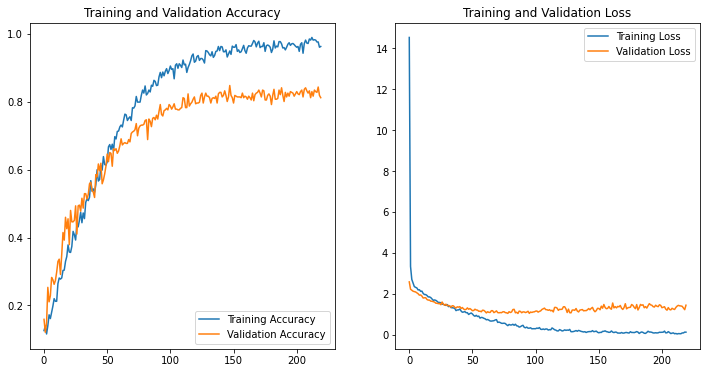

The overall Accuracy after traning: 0.7869368461045352
The overall Accuracy after Validation: 0.7043416230854663


In [71]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(12, 6))
plt.grid()

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


validation_accuracy = np.mean(history.history['val_accuracy'])
accuracy = np.mean(history.history['accuracy'])

print('The overall Accuracy after traning: {}'.format(accuracy))

print('The overall Accuracy after Validation: {}'.format(validation_accuracy))


In [72]:
model.predict(X_test)

array([[4.43403515e-05, 1.85802786e-08, 3.04936748e-06, ...,
        1.79679511e-04, 4.42617221e-07, 5.89969718e-09],
       [6.69168658e-04, 9.77302313e-01, 3.94656649e-03, ...,
        1.31897244e-03, 1.16138337e-02, 4.40890249e-03],
       [3.94214972e-09, 2.12255894e-04, 2.86017712e-05, ...,
        3.23128211e-06, 1.03778197e-09, 4.41472206e-12],
       ...,
       [2.47119859e-11, 6.05348901e-14, 3.15387771e-10, ...,
        1.12633862e-16, 1.00000000e+00, 1.30897619e-11],
       [3.52921779e-04, 1.84993098e-07, 1.55204383e-04, ...,
        9.99406457e-01, 3.10451668e-07, 6.77715434e-06],
       [1.19226694e-01, 5.68396121e-04, 1.62007436e-02, ...,
        9.22929794e-02, 2.50978053e-01, 5.68387425e-03]], dtype=float32)

In [73]:
filename="./Arunachal_Pradesh/indian spot-billed duck/pitch0.wav"
audio, sample_rate = librosa.load(filename,duration=5) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)

predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)

prediction_class = labelencoder.inverse_transform(predicted_label) 
print('The Pradictade Bird name for he given file is: {} '.format(prediction_class[0]))

The Pradictade Bird name for he given file is: indian spot-billed duck 


In [74]:
from lime.lime_text import LimeTextExplainer
lime_explainer = LimeTabularExplainer(X_train.values ,feature_names =feature_list ,
                                class_names =training_classes, mode = 'classification')    
exp = lime_explainer.explain_instance(X_test.iloc[2], model.predict, num_features = 10)
exp.show_in_notebook(show_table = True, show_all = False)

In [75]:
import shap
shap.initjs()